# Installation and Activation of Virtual Environment with Conda

## **For Windows**

1. **Create the virtual environment from the `environment.yml` file**:

    ```bash
    conda env create -f environment.yml
    ```

    (Make sure you have this file in your working directory)

2. **Activate the environment**:

    ```bash
    conda activate tfm_env
    ```

---

## **For Linux/macOS**

### **First time configuration of Conda** (if you haven't used Conda before)

1. **Initialize Conda**:

    For the first time, run the following command to initialize Conda in your terminal:

    ```bash
    conda init
    ```

2. **Reload the terminal configuration**:

    After running `conda init`, you may need to reload your terminal configuration. For **Linux/macOS**, you can do this by running:

    ```bash
    source ~/.bash_profile
    ```

    This will apply the changes.

### **Create and Activate the Virtual Environment**

1. **Create the virtual environment from the `environment.yml` file**:

    ```bash
    conda env create -f environment.yml
    ```

    (Make sure you have this file in your working directory)

2. **Activate the environment**:

    ```bash
    conda activate tfm_env
    ```

---


# Libraries

In [2]:
# Libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from shapely.geometry import Point
import os
import warnings
import folium
from sklearn.preprocessing import scale
from scipy.spatial import KDTree
from sklearn.metrics.pairwise import haversine_distances
from statsmodels.sandbox.stats.multicomp import distance_st_range

from project_functions import save_categorical_bar_plots, remove_outliers, categorical_analysis, \
    plot_categorical_features, missing_values_analysis

# Suppress warnings
warnings.filterwarnings('ignore')


# 1. Loading the Dataset

In [3]:
# Load the dataset from the CSV file
file_path = 'csv_output/Madrid_Sale.csv'
data = pd.read_csv(file_path)

# 2. General Exploration of the dataset

In [4]:
# Remove the 'geometry' column, as it is not relevant for this analysis
data.drop(columns=['geometry'], inplace=True)

# Display the dataset dimensions and a sample of the first few rows
print(f"Dataset dimensions: {data.shape}")
print('---------------------------------------------------------------')
print("First 5 rows of the dataset:\n")
data.columns

Dataset dimensions: (94815, 41)
---------------------------------------------------------------
First 5 rows of the dataset:



Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

In [5]:
# Check the data types of each column in the dataset
data.dtypes

ASSETID                           object
PERIOD                             int64
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                         int64
BATHNUMBER                         int64
HASTERRACE                         int64
HASLIFT                            int64
HASAIRCONDITIONING                 int64
AMENITYID                          int64
HASPARKINGSPACE                    int64
ISPARKINGSPACEINCLUDEDINPRICE      int64
PARKINGSPACEPRICE                  int64
HASNORTHORIENTATION                int64
HASSOUTHORIENTATION                int64
HASEASTORIENTATION                 int64
HASWESTORIENTATION                 int64
HASBOXROOM                         int64
HASWARDROBE                        int64
HASSWIMMINGPOOL                    int64
HASDOORMAN                         int64
HASGARDEN                          int64
ISDUPLEX                           int64
ISSTUDIO        

In [6]:
# List of columns to be converted from numeric to categorical
num_a_cat = ["PERIOD", "HASTERRACE", "HASLIFT", "HASAIRCONDITIONING", "AMENITYID", "HASPARKINGSPACE",
             "ISPARKINGSPACEINCLUDEDINPRICE", "HASNORTHORIENTATION", "HASSOUTHORIENTATION", "HASEASTORIENTATION",
             "HASWESTORIENTATION", "HASBOXROOM", "HASWARDROBE", "HASSWIMMINGPOOL", "HASDOORMAN", "HASGARDEN", "ISDUPLEX", 
             "ISSTUDIO", "ISINTOPFLOOR", "CADASTRALQUALITYID", "BUILTTYPEID_1", "BUILTTYPEID_2", "BUILTTYPEID_3", 
             "ROOMNUMBER", "BATHNUMBER","FLATLOCATIONID"]

# Convert numeric columns to categorical (object type) using the 'apply' function
data[num_a_cat] = data[num_a_cat].apply(lambda x: x.astype('object'))

# Check the data types of the columns after conversion
data.dtypes

ASSETID                           object
PERIOD                            object
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                        object
BATHNUMBER                        object
HASTERRACE                        object
HASLIFT                           object
HASAIRCONDITIONING                object
AMENITYID                         object
HASPARKINGSPACE                   object
ISPARKINGSPACEINCLUDEDINPRICE     object
PARKINGSPACEPRICE                  int64
HASNORTHORIENTATION               object
HASSOUTHORIENTATION               object
HASEASTORIENTATION                object
HASWESTORIENTATION                object
HASBOXROOM                        object
HASWARDROBE                       object
HASSWIMMINGPOOL                   object
HASDOORMAN                        object
HASGARDEN                         object
ISDUPLEX                          object
ISSTUDIO        

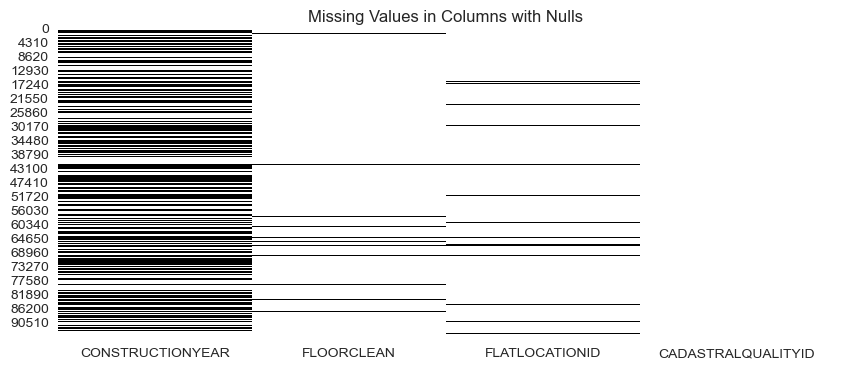

In [7]:
# Select columns with at least one null value
columns_with_nans = data.columns[data.isnull().any()]

# Filter the DataFrame to include only these columns
data_with_nans = data[columns_with_nans]

# Plot the heatmap with only columns that have missing values
plt.figure(figsize=(10, 4))
sns.heatmap(data_with_nans.isnull(), cbar=False, cmap='Greys')

# Add title and show the plot
plt.title("Missing Values in Columns with Nulls")
plt.show()

In [8]:
# Drop the 'CONSTRUCTIONYEAR' column because the 'CADCONSTRUCTIONYEAR' column 
# contains the same or more accurate information about the construction year.
data.drop(columns=['CONSTRUCTIONYEAR'],inplace=True)

In [9]:
# Find the duplicated rows in the 'ASSETID' column
duplicates = data[data['ASSETID'].duplicated()]

duplicates.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
2783,A5166385142982428764,201803,414000.0,4704.545455,88,2,1,0,1,0,...,82,3.0,0,0,1,2.303359,0.304688,0.910568,-3.679498,40.425870
3340,A9658442428237065374,201803,487000.0,7268.656716,67,2,1,0,1,1,...,13,4.0,0,0,1,0.460878,0.156260,1.289164,-3.709226,40.416691
3341,A1034208215991629606,201803,749000.0,4740.506329,158,0,0,0,1,0,...,12,3.0,0,1,0,0.497874,0.106661,1.329012,-3.709620,40.417139
3343,A4775182175615276542,201803,258000.0,5733.333333,45,1,1,0,1,1,...,15,5.0,0,0,1,0.906391,0.080037,1.539759,-3.710506,40.422927
3345,A16938985986712536769,201803,4407000.0,4929.530201,894,6,7,0,1,0,...,15,4.0,0,0,1,0.715702,0.348940,1.454769,-3.711149,40.413436


In [10]:
# List of ASSETIDs you want to filter
asset_ids = [
    'A9999219692481893574', 'A9998712247880672923', 'A9998114233912501493',
    'A9995962414057013729', 'A9995962414057013729', 'A9994202314028450695'
]

# Filter the rows where the ASSETID is in the list of ASSETIDs
specific_assets = data[data['ASSETID'].isin(asset_ids)]

# Display the rows corresponding to those ASSETIDs, sorted by 'ASSETID' in descending order
specific_assets.head().sort_values(by=['ASSETID'])

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
12177,A9995962414057013729,201812,692000.0,6178.571429,112,1,1,0,1,0,...,18,6.0,1,0,0,0.656706,0.195531,0.522865,-3.698722,40.421053
20572,A9995962414057013729,201812,664000.0,5928.571429,112,1,1,0,1,0,...,18,6.0,1,0,0,0.751896,0.098706,0.503737,-3.698164,40.421813
13321,A9998114233912501493,201812,849000.0,7134.453782,119,2,2,0,1,1,...,3,3.0,0,0,1,0.086812,0.339541,0.745874,-3.702766,40.416578
36635,A9998712247880672923,201812,870000.0,5304.878049,164,2,2,0,0,1,...,10,4.0,0,0,1,0.574298,0.127988,0.406554,-3.698478,40.413387
11584,A9999219692481893574,201803,264000.0,3666.666667,72,2,1,1,0,1,...,7,6.0,0,0,1,4.916850,0.449440,2.404153,-3.662654,40.447742


In [11]:
# Remove duplicated rows in the 'ASSETID' column, keeping only the first occurrence
data = data.drop_duplicates(subset='ASSETID')

# Display the DataFrame dimensions after removing duplicates
print(f"Dataset dimensions: {data.shape}")

Dataset dimensions: (75804, 40)


In [12]:
# List of ASSETIDs you want to filter
asset_ids = [
    'A9999219692481893574', 'A9998712247880672923', 'A9998114233912501493',
    'A9995962414057013729', 'A9995962414057013729', 'A9994202314028450695'
]

# Filter the rows where the ASSETID is in the list of ASSETIDs
specific_assets = data[data['ASSETID'].isin(asset_ids)]

# Display the rows corresponding to those ASSETIDs, sorted by 'ASSETID' in descending order
specific_assets.head().sort_values(by=['ASSETID'])

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
76496,A9994202314028450695,201812,342000.0,3600.000000,95,3,2,0,1,1,...,478,4.0,0,0,1,5.145646,0.503178,3.385175,-3.728560,40.374391
12177,A9995962414057013729,201812,692000.0,6178.571429,112,1,1,0,1,0,...,18,6.0,1,0,0,0.656706,0.195531,0.522865,-3.698722,40.421053
13321,A9998114233912501493,201812,849000.0,7134.453782,119,2,2,0,1,1,...,3,3.0,0,0,1,0.086812,0.339541,0.745874,-3.702766,40.416578
36635,A9998712247880672923,201812,870000.0,5304.878049,164,2,2,0,0,1,...,10,4.0,0,0,1,0.574298,0.127988,0.406554,-3.698478,40.413387
11584,A9999219692481893574,201803,264000.0,3666.666667,72,2,1,1,0,1,...,7,6.0,0,0,1,4.916850,0.449440,2.404153,-3.662654,40.447742


In [13]:
numerical_features = data.select_dtypes(include=['number']).drop(columns = ['LATITUDE','LONGITUDE','PARKINGSPACEPRICE']).columns
categorical_features = data.select_dtypes(exclude=['number']).drop(columns = ['ASSETID']).columns

print(f'Numercial features: {numerical_features}')
print('----------------------------------------------------------')
print(f'Categorical features: {categorical_features}')

Numercial features: Index(['PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'FLOORCLEAN',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA'],
      dtype='object')
----------------------------------------------------------
Categorical features: Index(['PERIOD', 'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR', 'FLATLOCATIONID',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2',
       'BUILTTYPEID_3'],
      dtype='object')


In [14]:
data.describe()

,PRICE,UNITPRICE,CONSTRUCTEDAREA,PARKINGSPACEPRICE,FLOORCLEAN,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
count,7.580400e+04,75804.000000,75804.000000,75804.000000,72690.000000,75804.000000,75804.000000,75804.000000,75804.000000,75804.000000,75804.000000,75804.000000,75804.000000
mean,3.895441e+05,3641.582370,100.250646,666.145177,2.745178,1965.466400,6.360601,38.716150,4.482177,0.475372,2.681288,-3.686301,40.420646
std,4.130975e+05,1712.959849,66.469512,7747.943705,2.253326,28.921797,2.842914,53.319746,3.060601,1.566674,2.656468,0.039070,0.036031
min,2.100000e+04,805.309735,21.000000,1.000000,-1.000000,1623.000000,0.000000,1.000000,0.015374,0.001416,0.001435,-3.832534,36.756391
25%,1.570000e+05,2206.652893,62.000000,1.000000,1.000000,1955.000000,5.000000,12.000000,2.403719,0.212755,1.040496,-3.708307,40.396508
50%,2.570000e+05,3448.275862,82.000000,1.000000,2.000000,1967.000000,6.000000,21.000000,4.114302,0.330021,1.962104,-3.693971,40.423030
75%,4.570000e+05,4734.042553,115.000000,1.000000,4.000000,1983.000000,8.000000,39.000000,6.219482,0.519193,3.854188,-3.666152,40.441251
max,8.133000e+06,9997.560976,985.000000,925001.000000,11.000000,2018.000000,26.000000,1499.000000,415.752584,399.477366,412.803688,-2.753303,40.520637


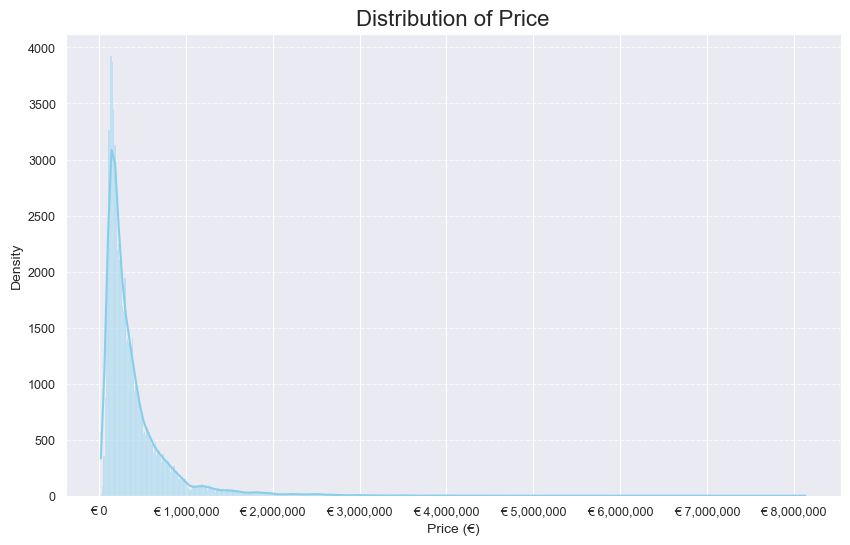

In [15]:
# Create a distribution plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['PRICE'], kde=True, color='skyblue')

# Format the x-axis labels with the € symbol
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('€ {x:,.0f}'))

# Customize title and axis labels
plt.title('Distribution of Price', fontsize=16)
plt.xlabel('Price (€)', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.savefig('plots/price_distribution.png', format = 'png', dpi=300) # Save plot
plt.show()

In [16]:
# %run project_functions.py
# labels = {
#     'HASTERRACE': {1: 'Tiene terraza', 0: 'No tiene terraza'},
#     'HASLIFT': {1: 'Tiene ascensor', 0: 'No tiene ascensor'},
#     'HASAIRCONDITIONING': {1: 'Tiene aire acondicionado', 0: 'No tiene aire acondicionado'},
#     'HASPARKINGSPACE': {1: 'Tiene aparcamiento', 0: 'No tiene aparcamiento'},
#     'ISPARKINGSPACEINCLUDEDINPRICE': {1: 'Incluido en el precio', 0: 'No incluido en el precio'},
#     'HASBOXROOM': {1: 'Tiene trastero', 0: 'No tiene trastero'},
#     'HASWARDROBE': {1: 'Tiene armario', 0: 'No tiene armario'},
#     'HASSWIMMINGPOOL': {1: 'Tiene piscina', 0: 'No tiene piscina'},
#     'HASDOORMAN': {1: 'Tiene portero', 0: 'No tiene portero'},
#     'HASGARDEN': {1: 'Tiene jardín', 0: 'No tiene jardín'},
#     'ISDUPLEX': {1: 'Es dúplex', 0: 'No es dúplex'},
#     'ISSTUDIO': {1: 'Es estudio', 0: 'No es estudio'},
#     'FLATLOCATIONID_RECATEGORIZED': {1: 'Externas', 0: 'Internas'}
# }

# 3. Analysis of Categorical Variables

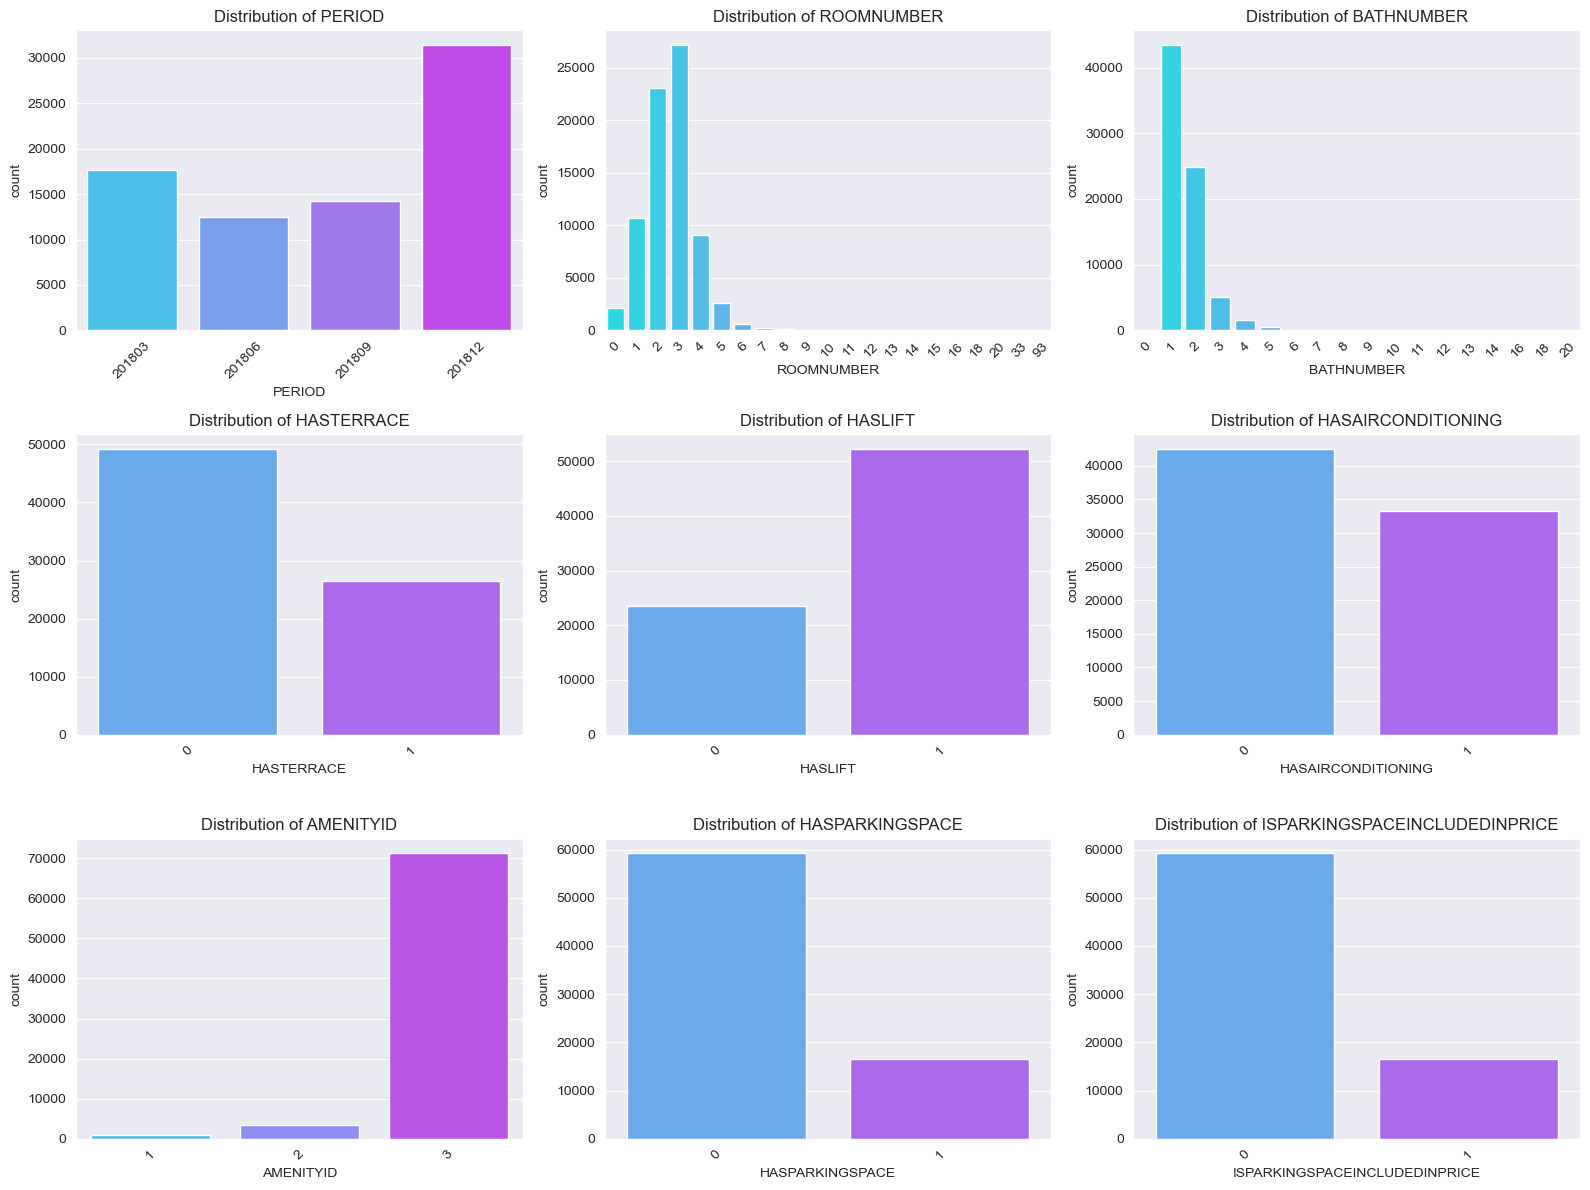

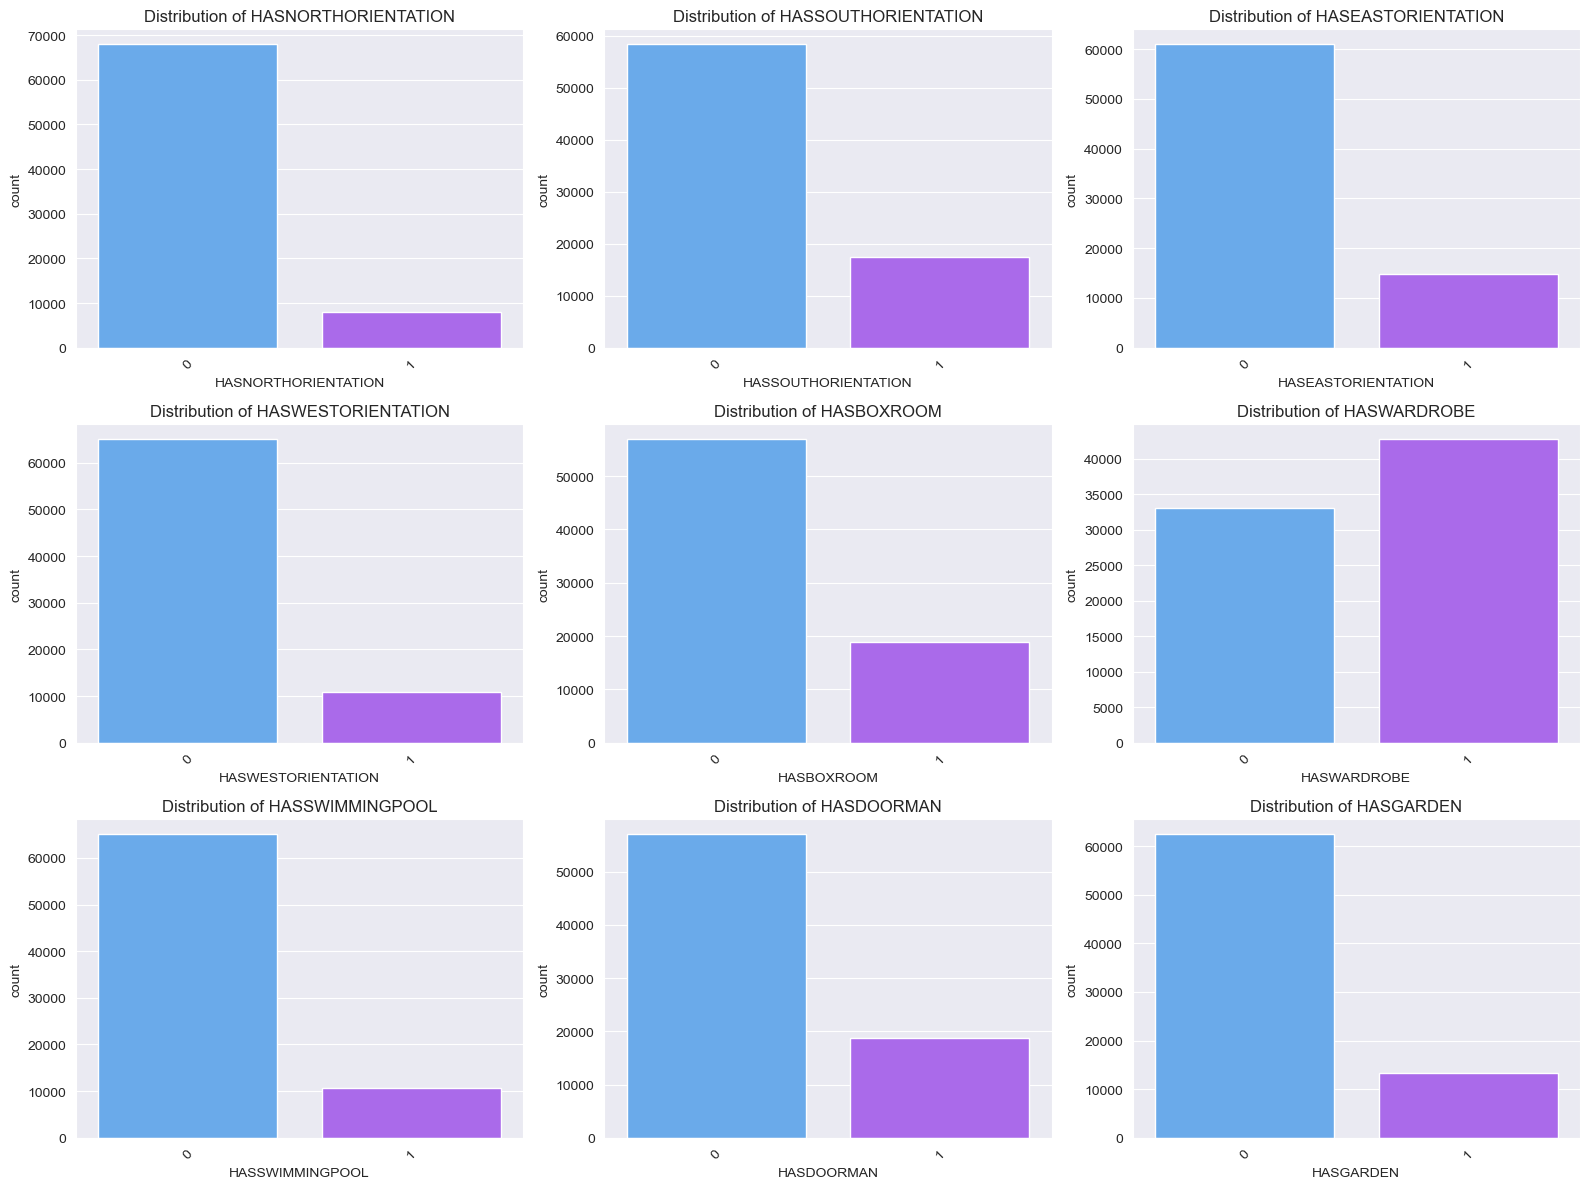

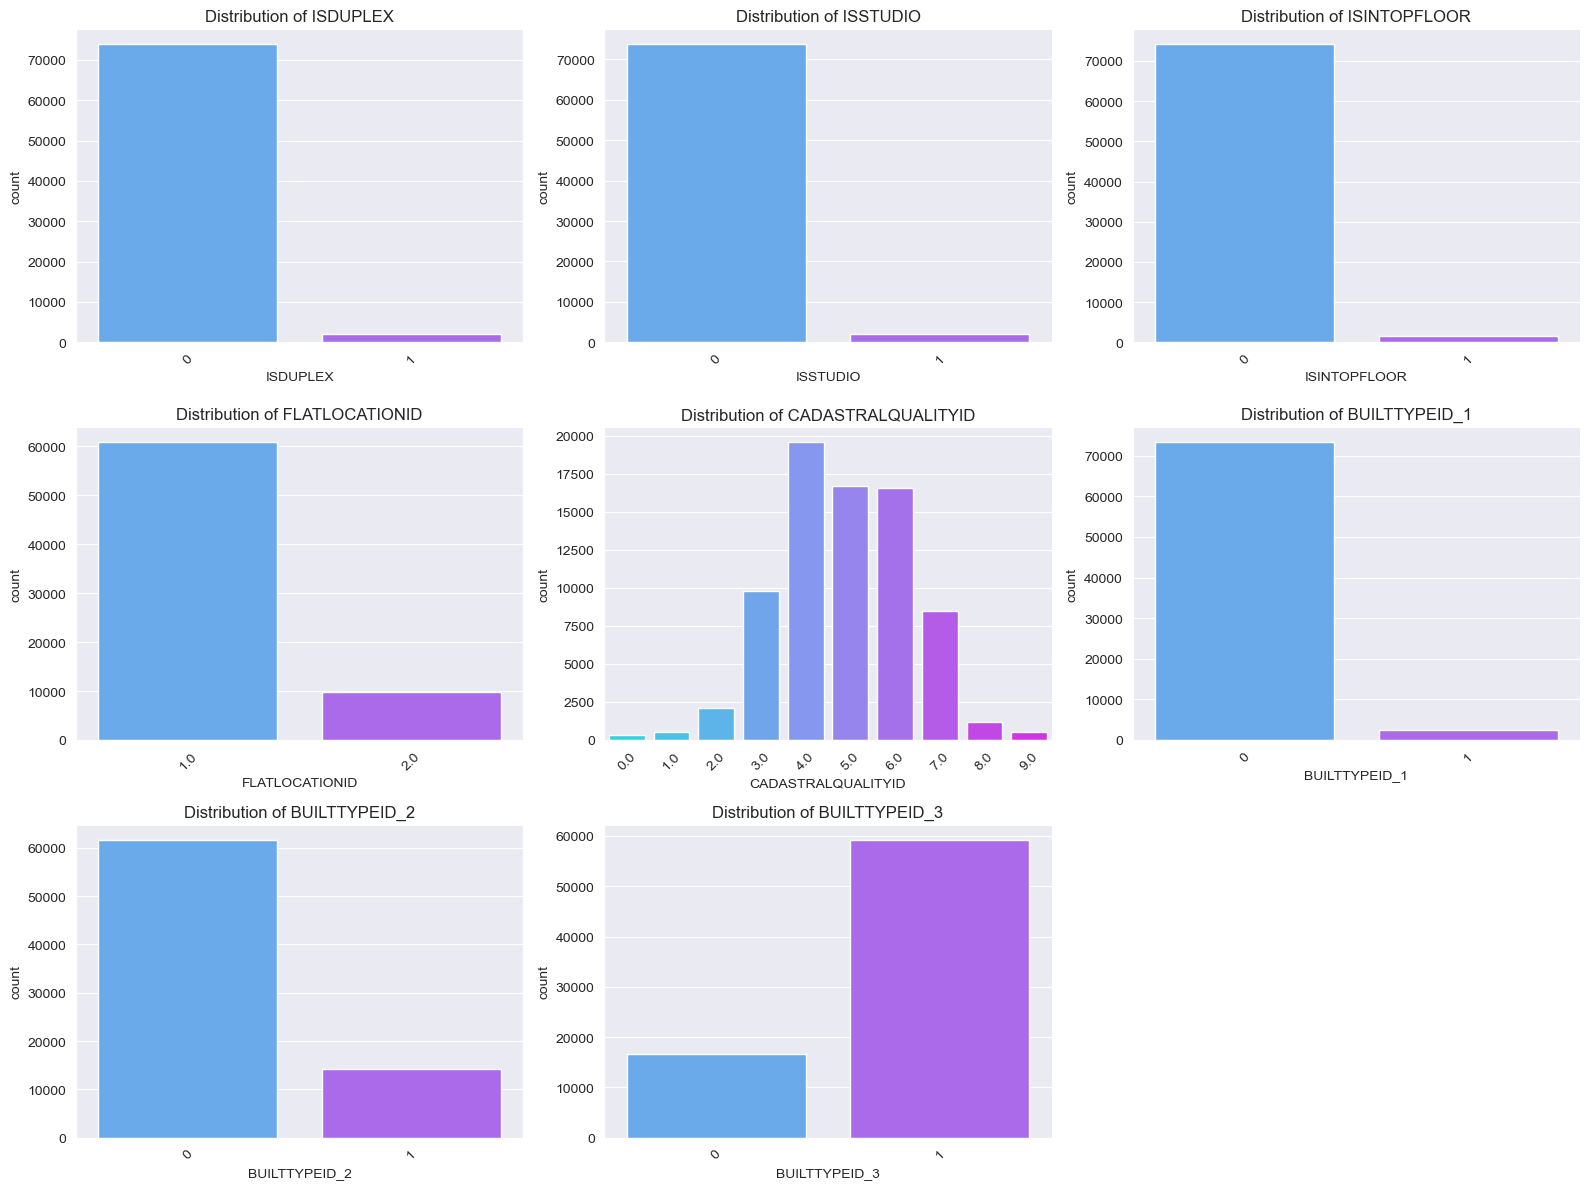

In [17]:
plot_categorical_features(data,categorical_features)

In [18]:
data['FLATLOCATIONID_RECATEGORIZED'] = data['FLATLOCATIONID'].apply(lambda x: '0' if x == 2.0 else '1')
categorical_analysis(data, categorical_features = ['FLATLOCATIONID_RECATEGORIZED'])


values  percentage
FLATLOCATIONID_RECATEGORIZED 1   66074   87.164266
                             0    9730   12.835734

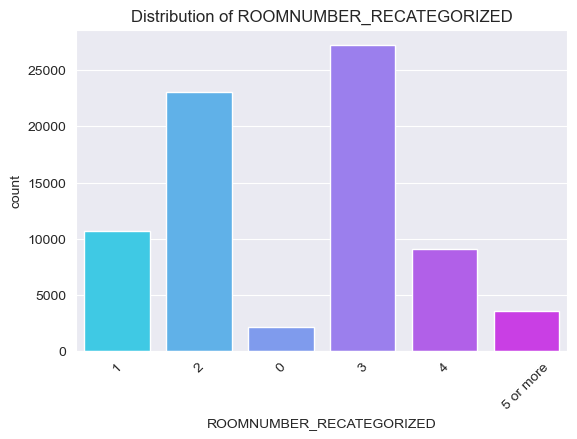

In [19]:
data['ROOMNUMBER_RECATEGORIZED'] = data['ROOMNUMBER'].apply(lambda x: '5 or more' if x >= 5 else str(x))
plot_categorical_features(data, categorical_features = ['ROOMNUMBER_RECATEGORIZED'])

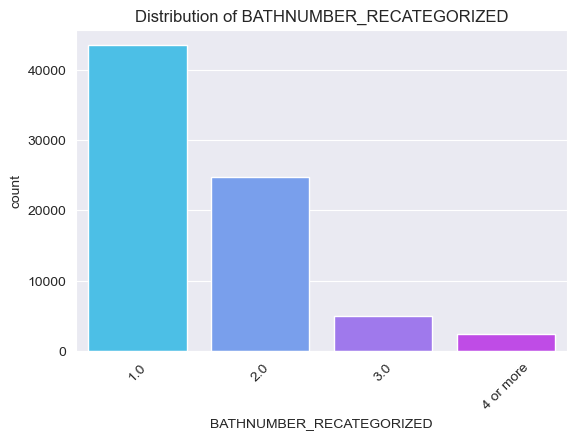

In [20]:
data['BATHNUMBER'] = data['BATHNUMBER'].replace(0, np.nan)
data['BATHNUMBER_RECATEGORIZED'] = data['BATHNUMBER'].apply(lambda x: '4 or more' if x >= 4 else x)
plot_categorical_features(data, categorical_features = ['BATHNUMBER_RECATEGORIZED'])

In [21]:
categorical_analysis(data, categorical_features = ['CADASTRALQUALITYID'])

values  percentage
CADASTRALQUALITYID 4.0   19594   25.848581
                   5.0   16678   22.001768
                   6.0   16596   21.893593
                   3.0    9807   12.937483
                   7.0    8509   11.225149
                   2.0    2114    2.788808
                   8.0    1207    1.592285
                   1.0     494    0.651689
                   9.0     493    0.650370
                   0.0     311    0.410274

In [22]:
data['CADASTRALQUALITYID_RECATEGORIZED'] = data['CADASTRALQUALITYID'].apply(lambda x: 'Calidad Baja' if 0 <= x <= 3 else
                                                                            ('Calidad Media' if 3 < x <= 6 else 'Calidad Alta'
                                                                            ))
categorical_analysis(data, categorical_features = ['CADASTRALQUALITYID_RECATEGORIZED'])

values  percentage
CADASTRALQUALITYID_RECATEGORIZED Calidad Media   52868   69.743021
                                 Calidad Baja    12726   16.788032
                                 Calidad Alta    10210   13.468946

In [23]:
categorical_analysis(data, categorical_features = ['AMENITYID'])

values  percentage
AMENITYID 3   71340   94.111129
          2    3409    4.497124
          1    1055    1.391747

In [24]:
# Call the function to generate and save bar plots for the specified categorical features as PNG files
#saved_files = save_categorical_bar_plots(data, categorical_features)

# 4. Analysis of Numerical Variables

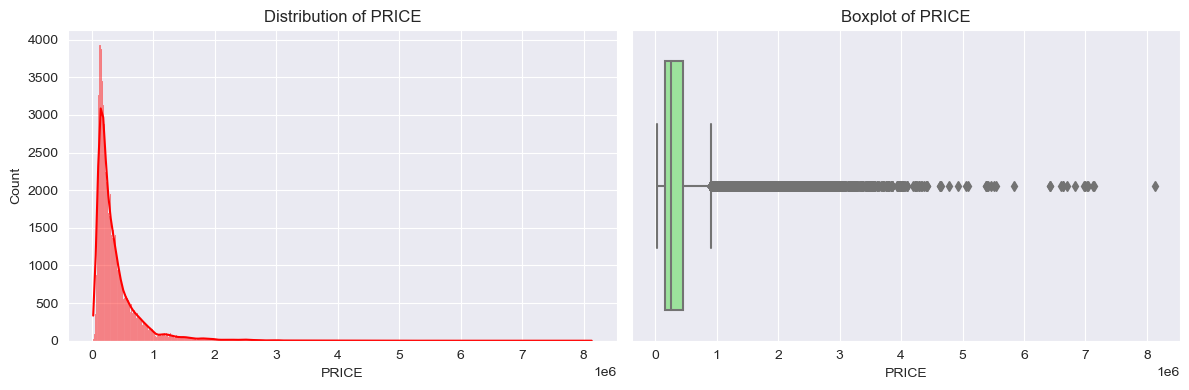

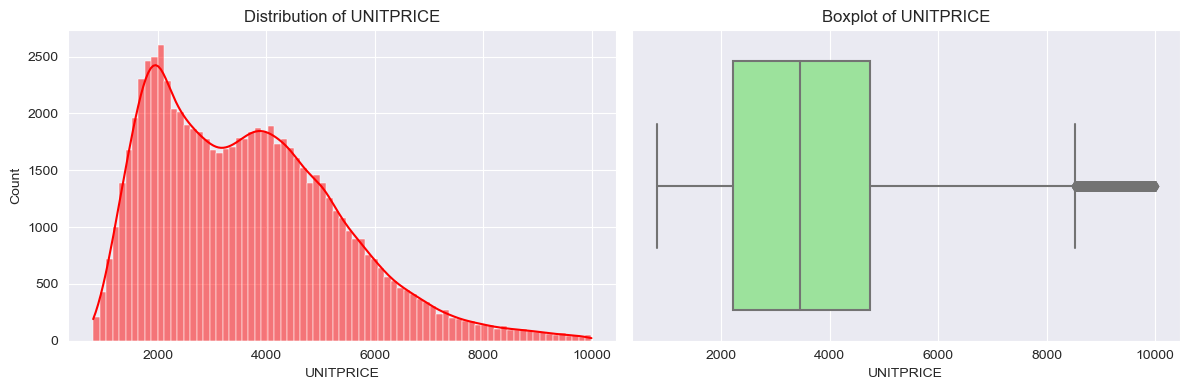

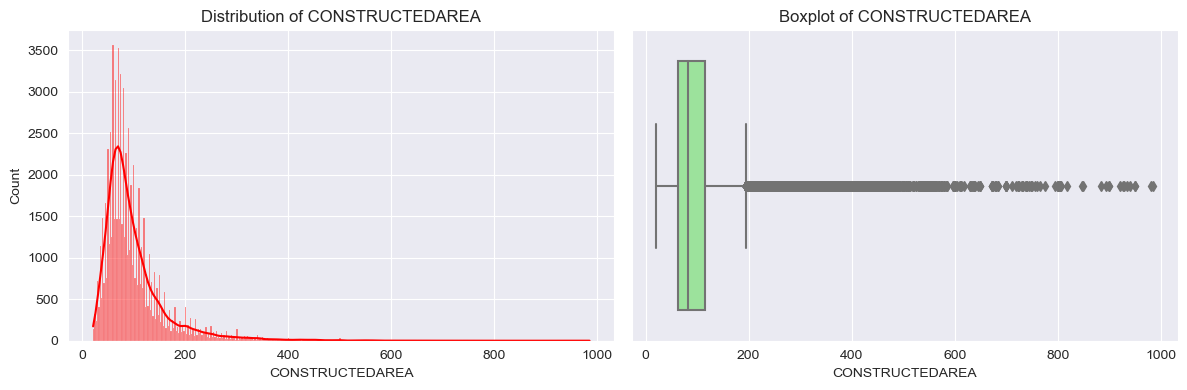

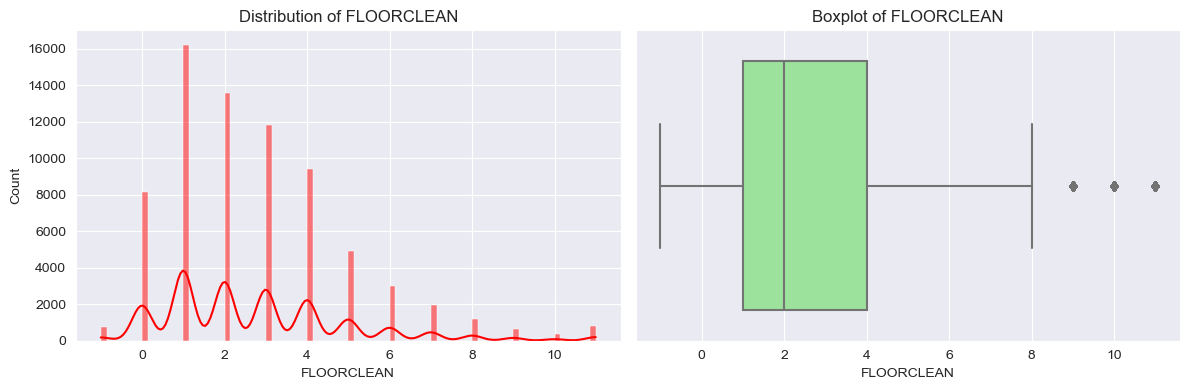

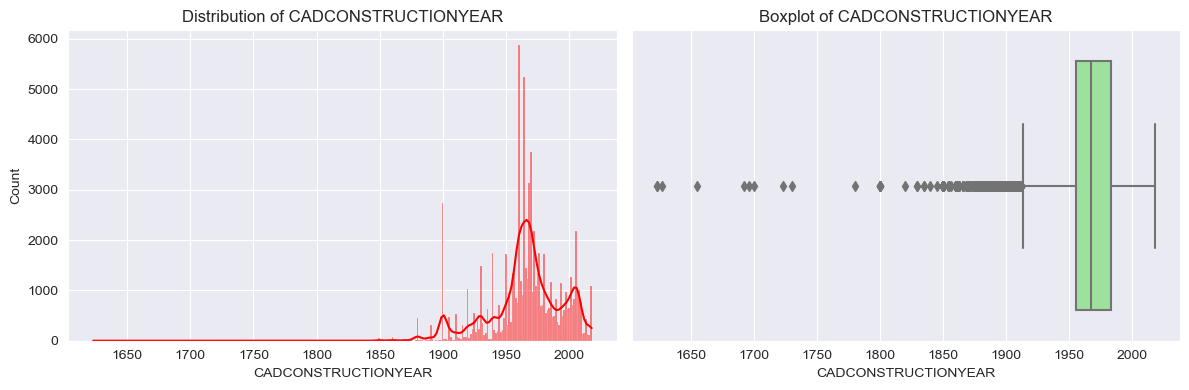

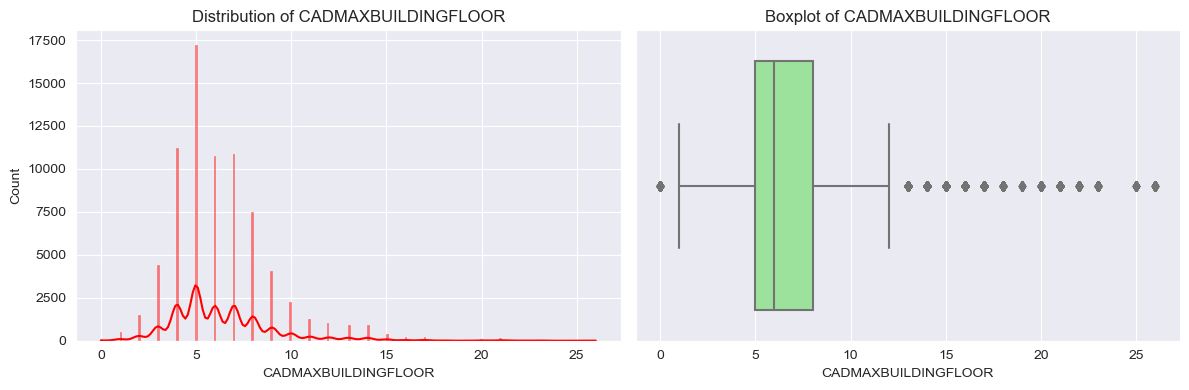

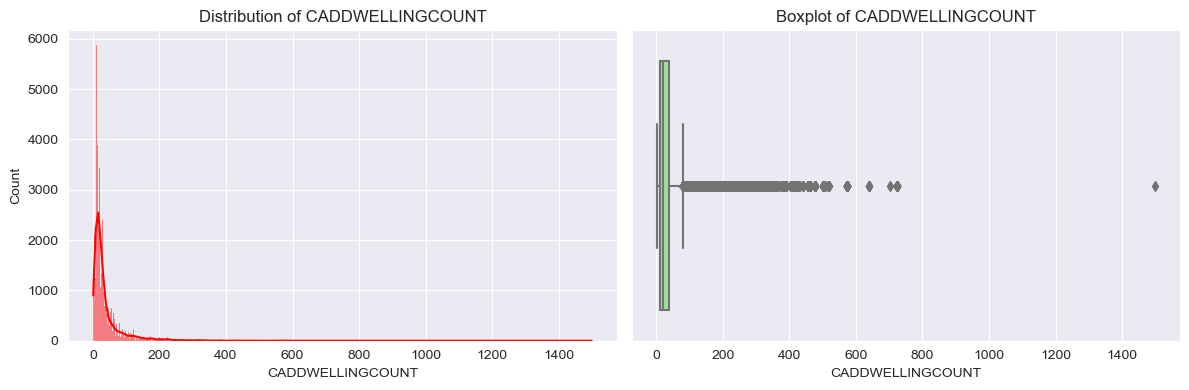

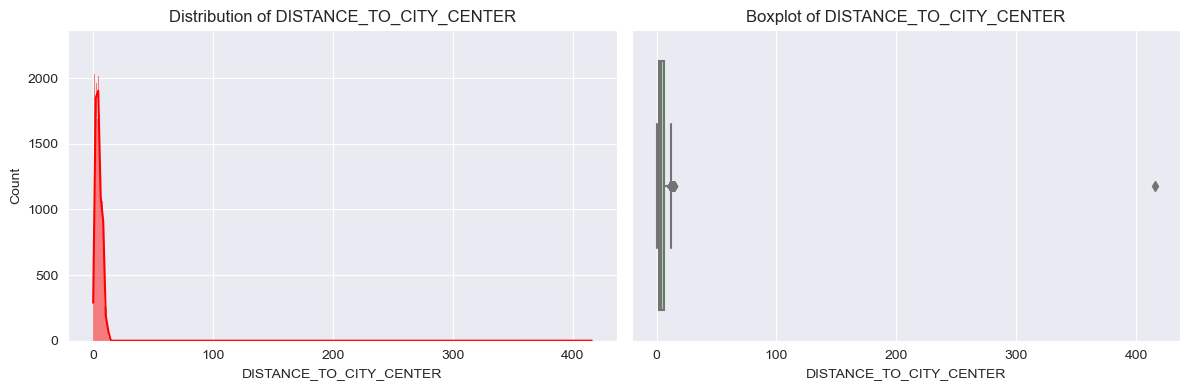

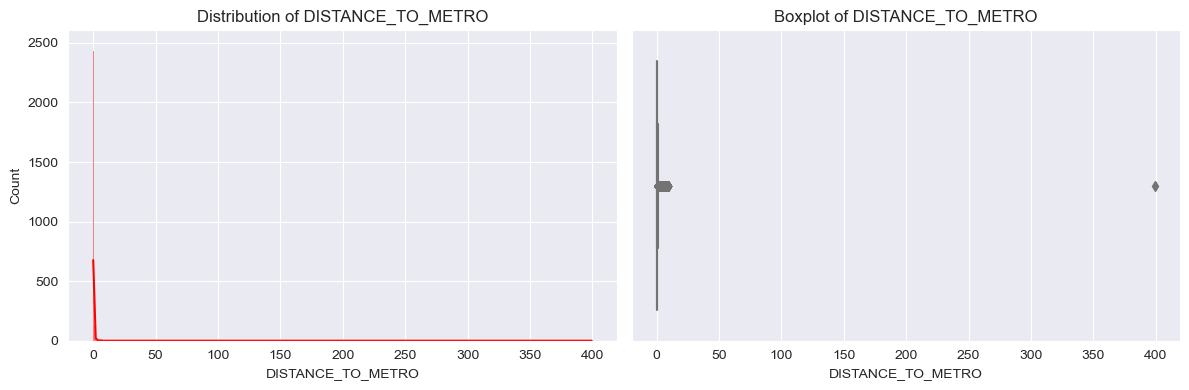

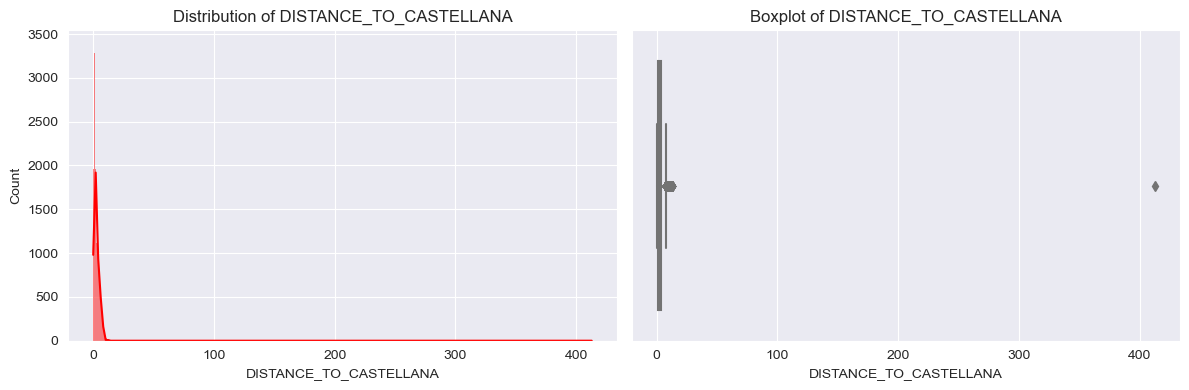

In [25]:
# Descriptive Analysis
for var in numerical_features:

    # Visualizing the distribution
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True, color='red')
    plt.title(f'Distribution of {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var], color='lightgreen')
    plt.title(f'Boxplot of {var}')

    plt.tight_layout()
plt.show()

In [26]:
# Descriptive statistics for numerical variables using the describe() function in Python
descriptive_stats_num = data[numerical_features].describe().transpose()

# Adding more descriptive statistics to the previous ones
for num in numerical_features:
    descriptive_stats_num.loc[num, "Skewness"] = data[num].skew()
    descriptive_stats_num.loc[num, "Kurtosis"] = data[num].kurtosis()
    descriptive_stats_num.loc[num, "Range"] = np.ptp(data[num].dropna().values)

descriptive_stats_num

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Range
PRICE,75804.0,389544.087383,413097.493988,21000.000000,157000.000000,257000.000000,457000.000000,8.133000e+06,4.069826,29.296932,8.112000e+06
UNITPRICE,75804.0,3641.582370,1712.959849,805.309735,2206.652893,3448.275862,4734.042553,9.997561e+03,0.733740,0.243853,9.192251e+03
CONSTRUCTEDAREA,75804.0,100.250646,66.469512,21.000000,62.000000,82.000000,115.000000,9.850000e+02,3.270475,18.707879,9.640000e+02
FLOORCLEAN,72690.0,2.745178,2.253326,-1.000000,1.000000,2.000000,4.000000,1.100000e+01,1.154505,1.595857,1.200000e+01
CADCONSTRUCTIONYEAR,75804.0,1965.466400,28.921797,1623.000000,1955.000000,1967.000000,1983.000000,2.018000e+03,-0.806246,1.975008,3.950000e+02
CADMAXBUILDINGFLOOR,75804.0,6.360601,2.842914,0.000000,5.000000,6.000000,8.000000,2.600000e+01,1.760902,5.779136,2.600000e+01
CADDWELLINGCOUNT,75804.0,38.716150,53.319746,1.000000,12.000000,21.000000,39.000000,1.499000e+03,4.290636,32.163430,1.498000e+03
DISTANCE_TO_CITY_CENTER,75804.0,4.482177,3.060601,0.015374,2.403719,4.114302,6.219482,4.157526e+02,32.403678,4300.251911,4.157372e+02
DISTANCE_TO_METRO,75804.0,0.475372,1.566674,0.001416,0.212755,0.330021,0.519193,3.994774e+02,218.264605,55503.361814,3.994760e+02
DISTANCE_TO_CASTELLANA,75804.0,2.681288,2.656468,0.001435,1.040496,1.962104,3.854188,4.128037e+02,49.240880,7494.176383,4.128023e+02


In [27]:
data_final = remove_outliers(data, numerical_features)
print(f'Dimension of dataset: {data_final.shape}')
data_final.head()

Dimension of dataset: (73664, 10)


,PRICE,UNITPRICE,CONSTRUCTEDAREA,FLOORCLEAN,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA
0,126000.0,2680.851064,47,1.0,2005,7,319,8.058429,0.872075,6.868677
1,235000.0,4351.851852,54,1.0,1900,5,11,0.876369,0.116382,1.544125
2,373000.0,4973.333333,75,3.0,1915,6,26,0.907479,0.139109,1.608444
3,284000.0,5916.666667,48,1.0,1947,9,15,0.845462,0.144299,1.516166
4,228000.0,4560.000000,50,0.0,1930,5,19,1.250231,0.337098,1.794136


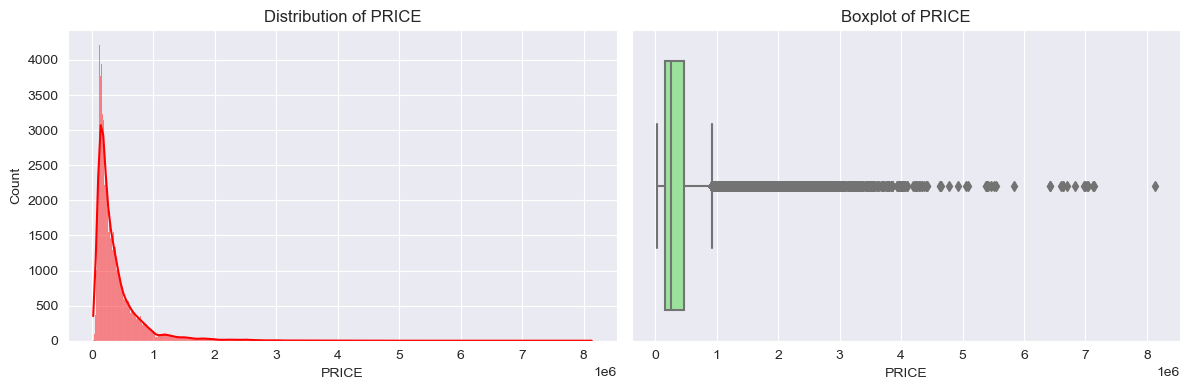

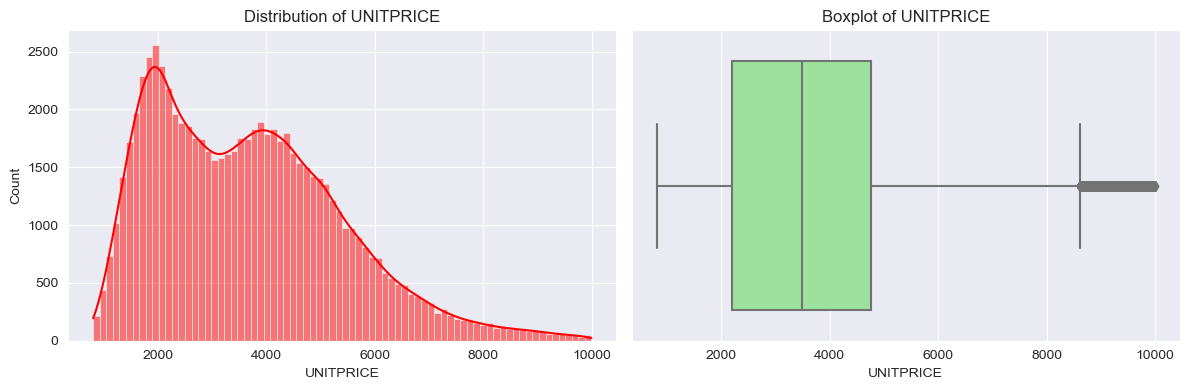

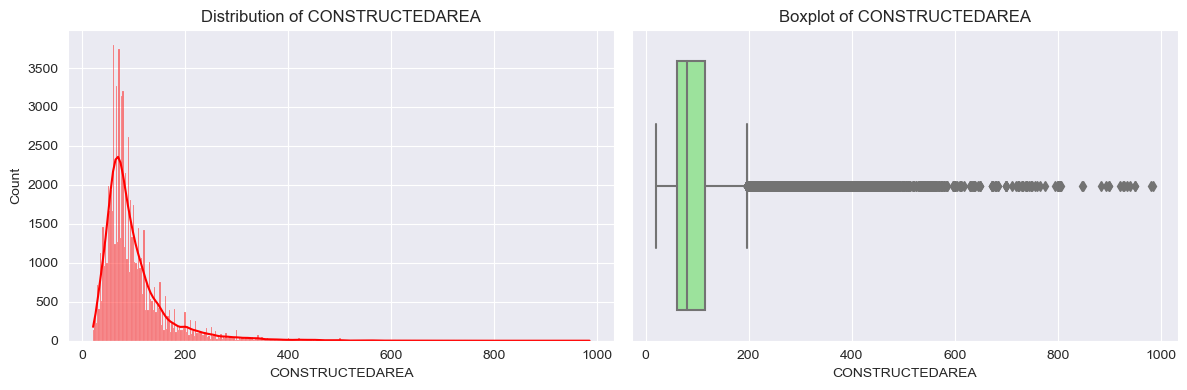

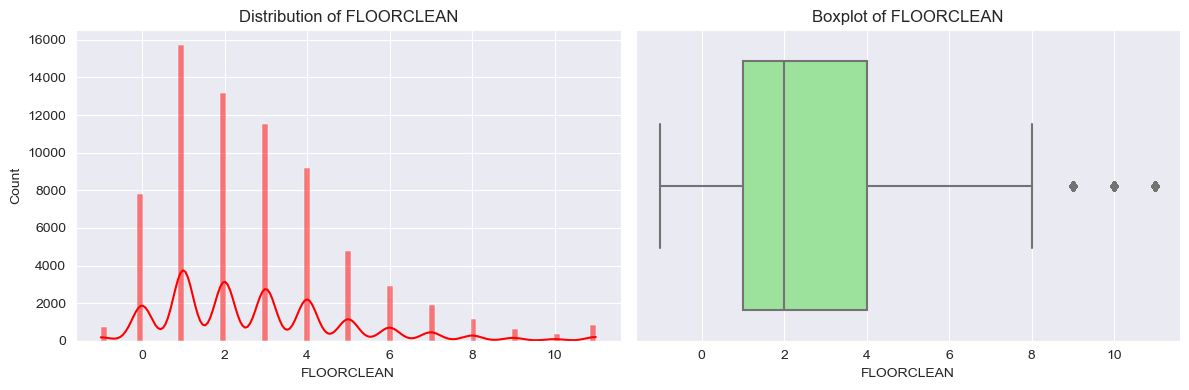

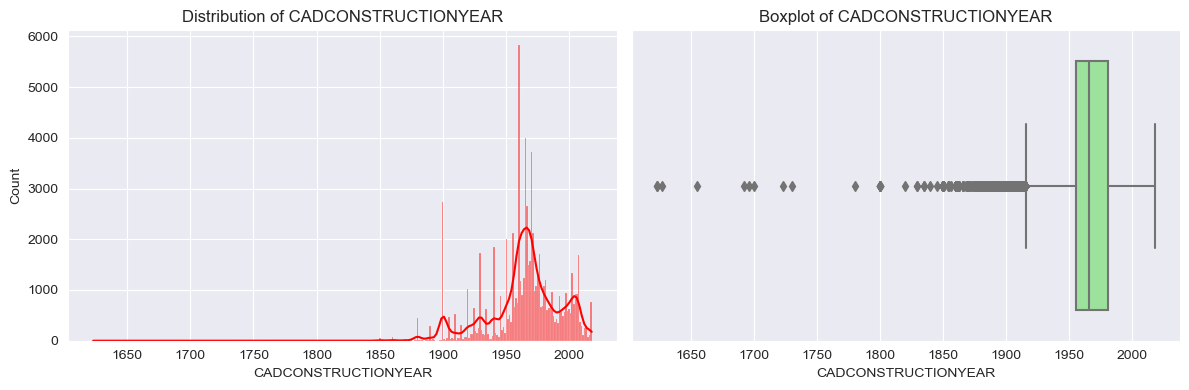

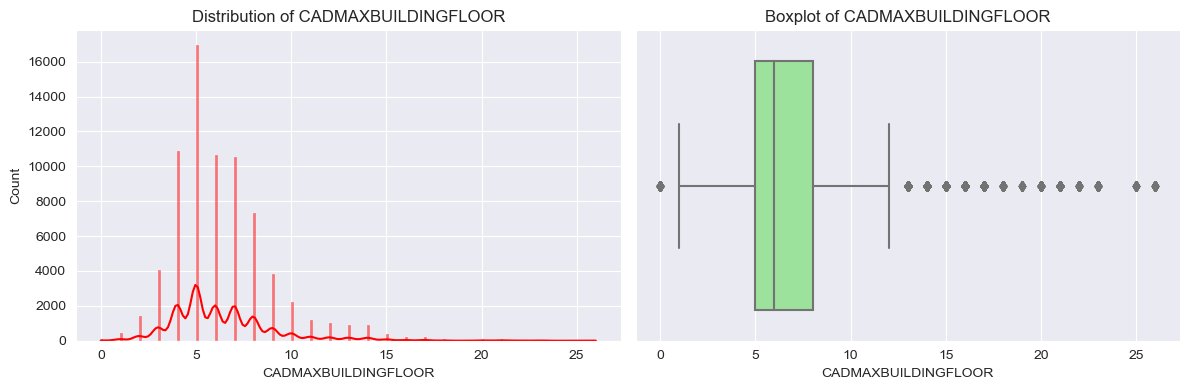

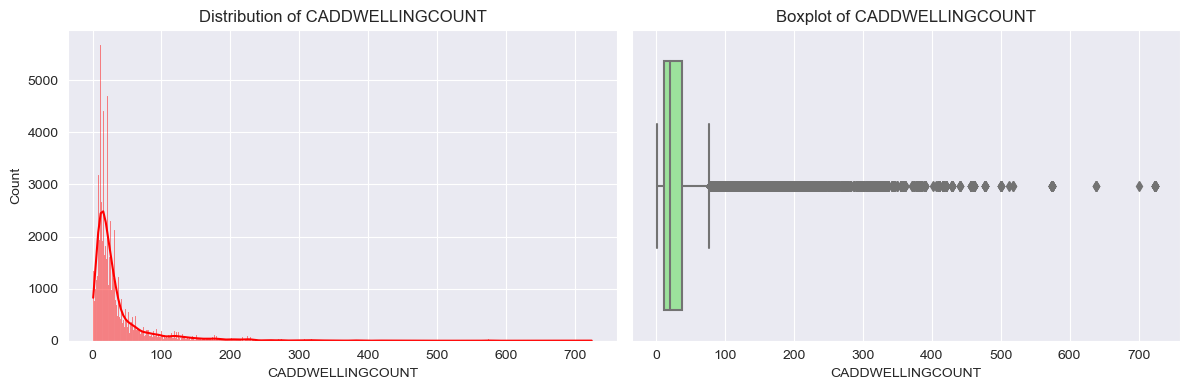

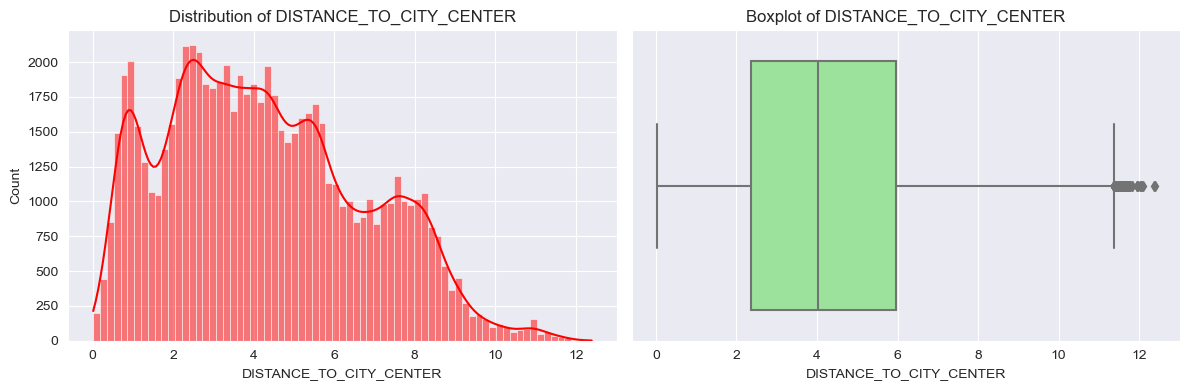

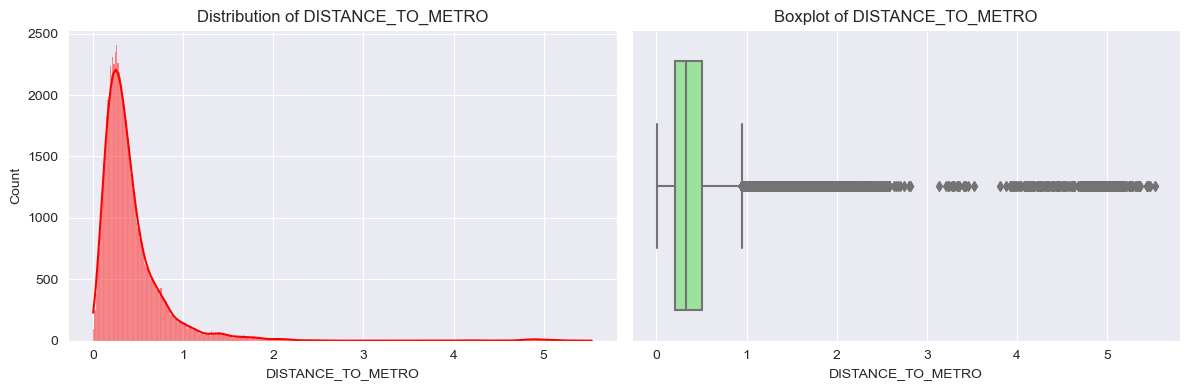

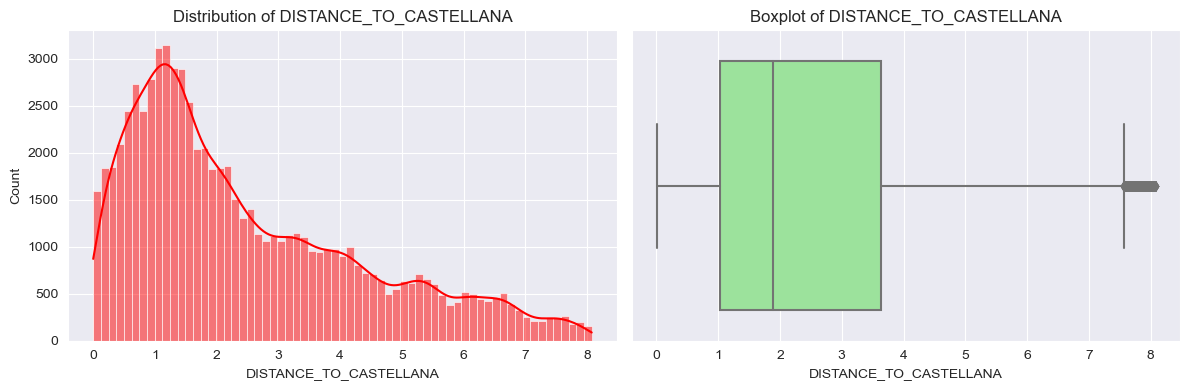

In [28]:
# Descriptive Analysis
for var in numerical_features:

    # Visualizing the distribution
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_final[var], kde=True, color='red')
    plt.title(f'Distribution of {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_final[var], color='lightgreen')
    plt.title(f'Boxplot of {var}')

    plt.tight_layout()
plt.show()

In [29]:
data_final = data_final[(data_final['PRICE'] < 2000000) & (data_final['CADCONSTRUCTIONYEAR'] > 1900)]
data_final.head()
# data_final.dropna(inplace=True)

,PRICE,UNITPRICE,CONSTRUCTEDAREA,FLOORCLEAN,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA
0,126000.0,2680.851064,47,1.0,2005,7,319,8.058429,0.872075,6.868677
2,373000.0,4973.333333,75,3.0,1915,6,26,0.907479,0.139109,1.608444
3,284000.0,5916.666667,48,1.0,1947,9,15,0.845462,0.144299,1.516166
4,228000.0,4560.000000,50,0.0,1930,5,19,1.250231,0.337098,1.794136
6,225000.0,6428.571429,35,2.0,1942,6,15,0.859565,0.126995,1.517437


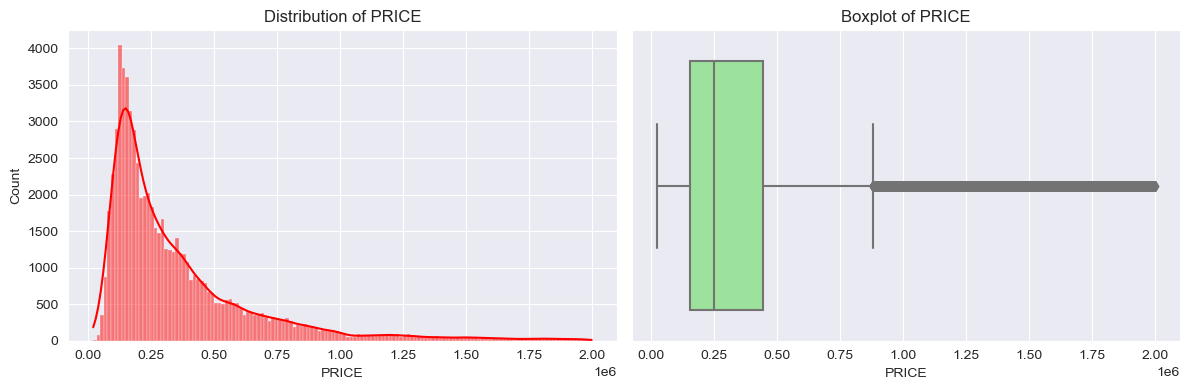

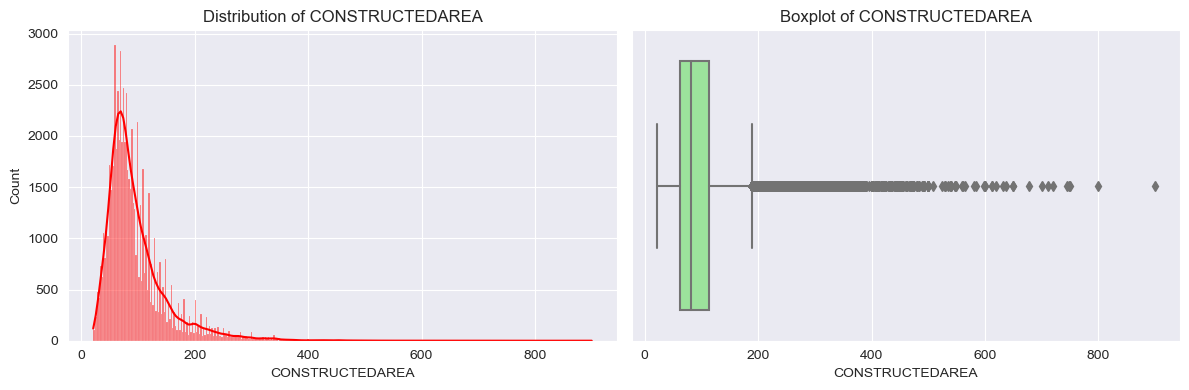

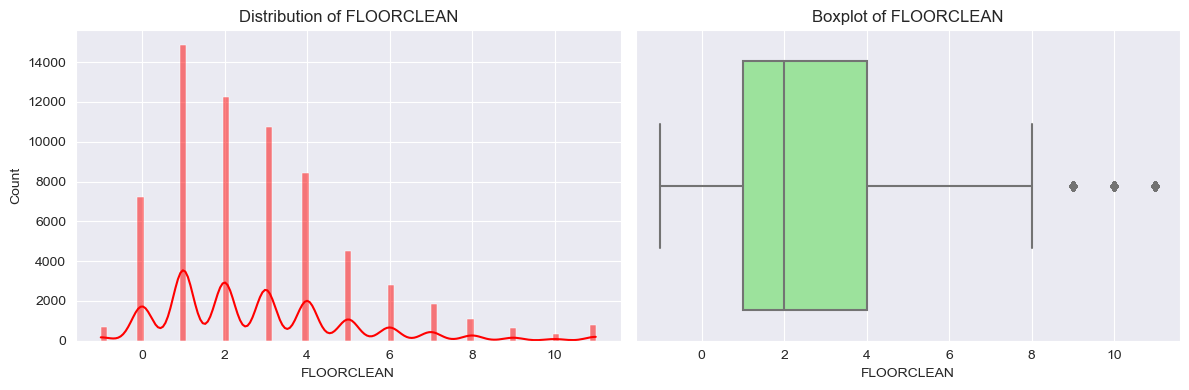

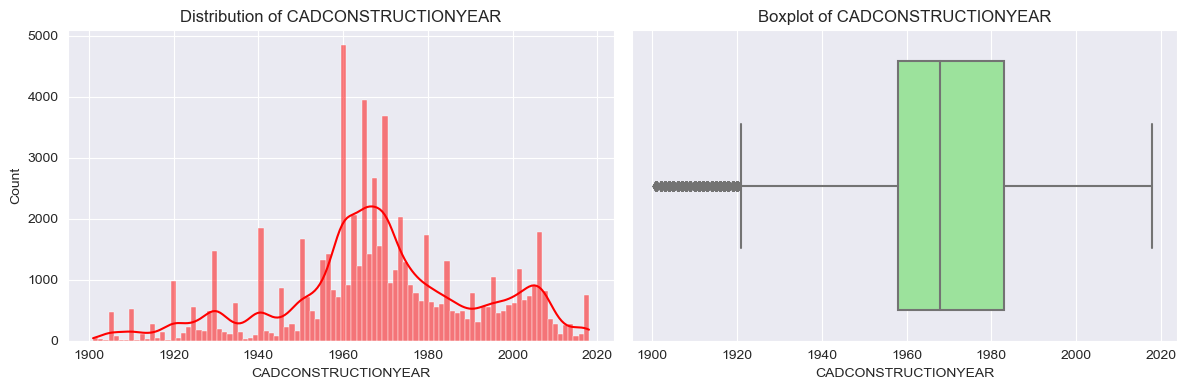

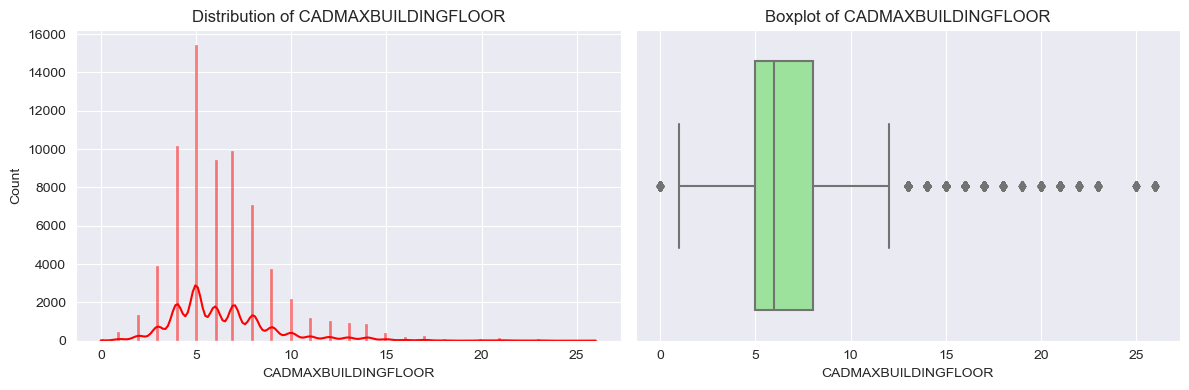

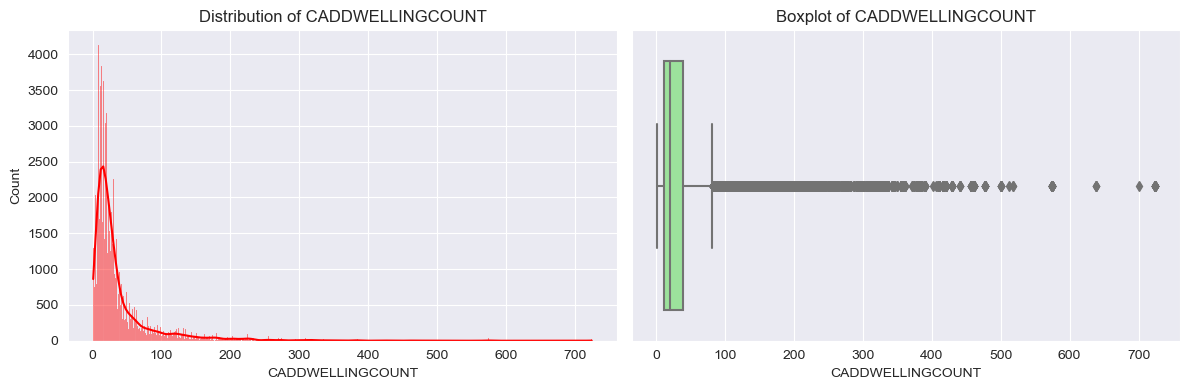

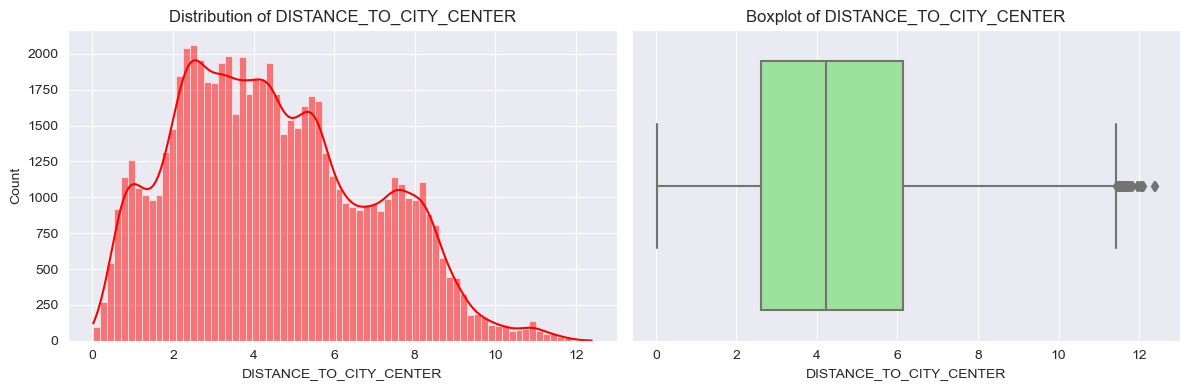

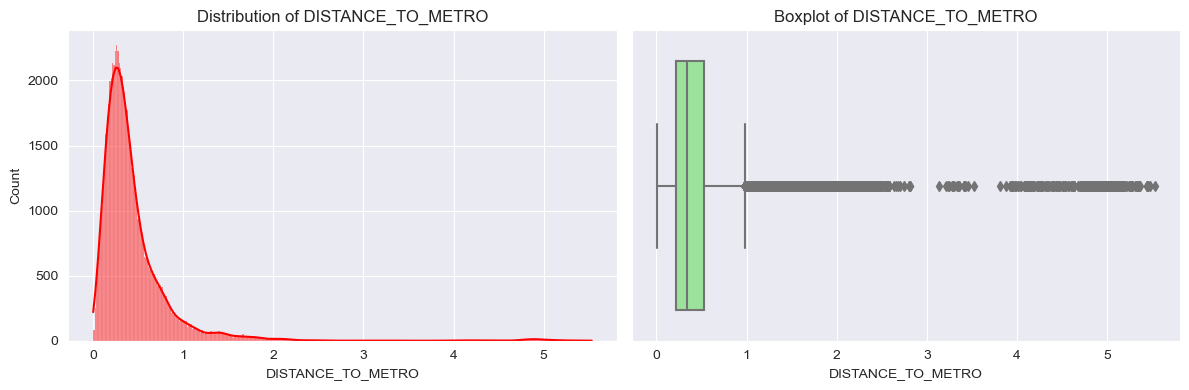

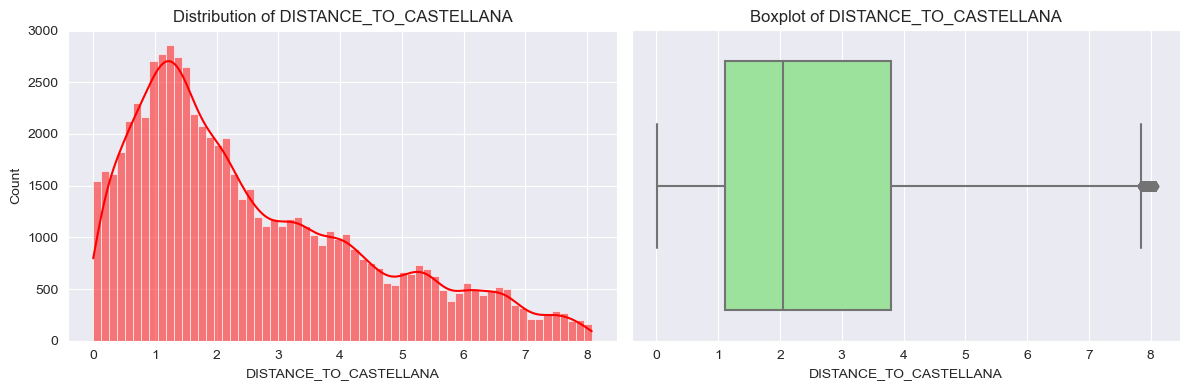

In [30]:
numerical_features = data_final.select_dtypes(include=['number']).drop(
    columns=['LATITUDE', 'LONGITUDE', 'PARKINGSPACEPRICE', 'UNITPRICE'], errors='ignore'
).columns
# Descriptive Analysis
for var in numerical_features:

    # Visualizing the distribution
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_final[var], kde=True, color='red')
    plt.title(f'Distribution of {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_final[var], color='lightgreen')
    plt.title(f'Boxplot of {var}')

    plt.tight_layout()
plt.show()

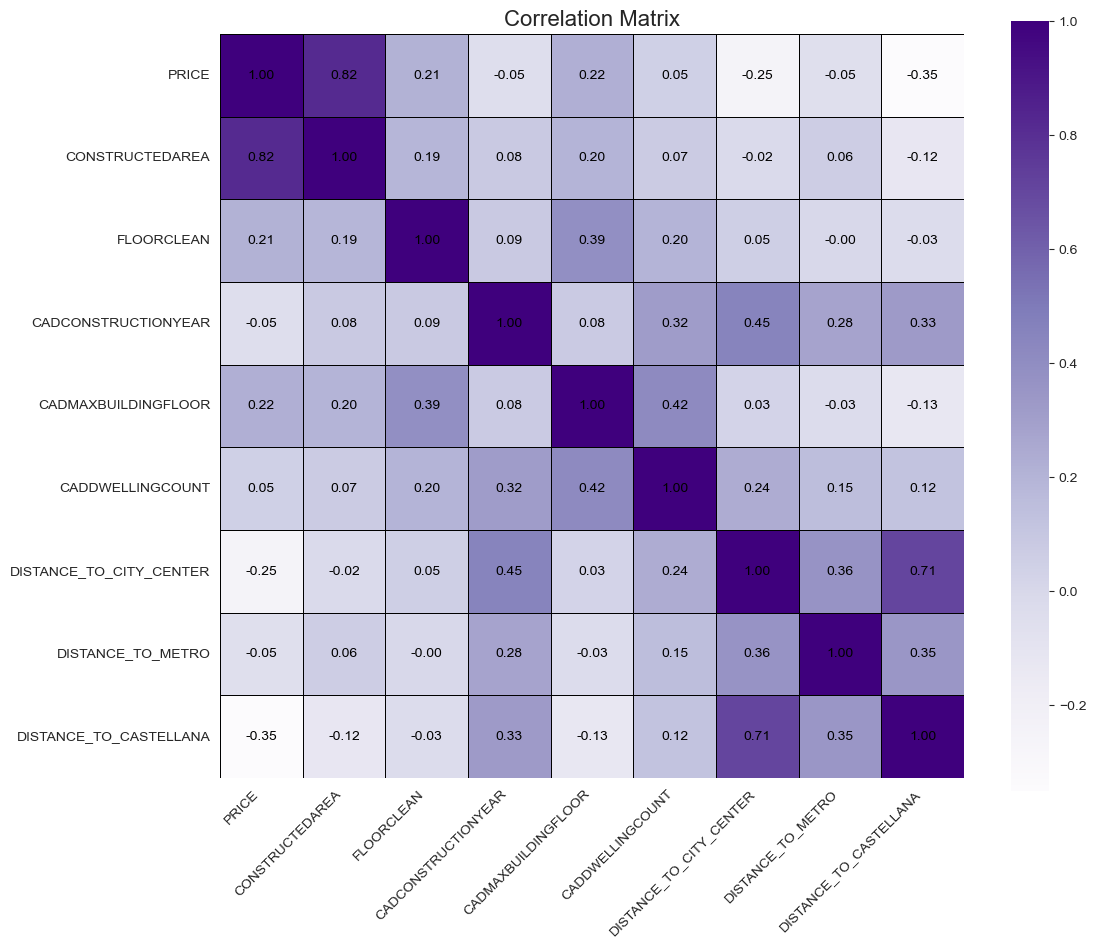

In [31]:
# Calcular la matriz de correlaciones
correlation_matrix = data_final[numerical_features].corr()

# Crear la figura
plt.figure(figsize=(12, 10))

# Crear el heatmap con anotaciones activadas
sns.heatmap(correlation_matrix,
            annot=True,  # Añadir los valores de correlación automáticamente
            cmap="Purples",
            cbar=True,
            square=True,
            linewidths=0.5,
            linecolor='black',
            fmt=".2f",  # Formato de los valores
            annot_kws={"size": 10, "color": "black"}  # Personalización del tamaño y color de las anotaciones
)

# Títulos y etiquetas
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Mostrar el gráfico
plt.show()

In [32]:
# import seaborn as sns
# import matplotlib
# import pandas as pd
# import numpy as np
#
# print(f"Seaborn version: {sns.__version__}")
# print(f"Matplotlib version: {matplotlib.__version__}")
# print(f"Pandas version: {pd.__version__}")
# print(f"Numpy version: {np.__version__}")

# 5. Analysis of Missing Values

In [33]:
missing_values_analysis(data)

,Missing Values,Percentage (%)
FLATLOCATIONID,5162,6.809667
FLOORCLEAN,3114,4.107963
BATHNUMBER,70,0.092343
BATHNUMBER_RECATEGORIZED,70,0.092343
CADASTRALQUALITYID,1,0.001319


# 6. Plots Madrid

In [34]:
file_path = os.getcwd()
file = os.path.join(file_path, 'cartographic_data\Madrid\Distritos.shp')
district = gpd.read_file(file).drop_duplicates()
district.head()

,Shape_Leng,COD_DIS,COD_DIS_TX,NOMBRE,DISTRI_MAY,DISTRI_MT,geometry
0,0.0,1,01,Centro,CENTRO,CENTRO,"POLYGON ((441184.784 4473200.780, 441181.244 4..."
1,0.0,2,02,Arganzuela,ARGANZUELA,ARGANZUELA,"POLYGON ((440272.919 4472969.567, 440350.318 4..."
2,0.0,3,03,Retiro,RETIRO,RETIRO,"POLYGON ((443652.149 4473312.600, 443560.739 4..."
3,0.0,4,04,Salamanca,SALAMANCA,SALAMANCA,"POLYGON ((444075.178 4476611.827, 444057.808 4..."
4,0.0,5,05,ChamartÃ­n,CHAMARTIN,CHAMARTÃN,"POLYGON ((442904.114 4481525.212, 442901.020 4..."


<AxesSubplot:>

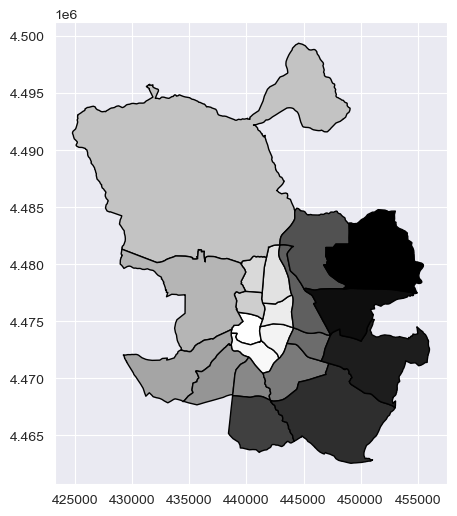

In [35]:
district.plot(edgecolor='black', cmap = 'Greys', figsize=(10, 6))

In [40]:
# Verify the shapefile
file_path = os.getcwd()
file = os.path.join(file_path, 'cartographic_data/Madrid/Distritos.shp')

if not os.path.exists(file):
    raise FileNotFoundError(f"Shapefile not found at {file}")

# Load the shapefile data
district = gpd.read_file(file).drop_duplicates()

# Handle invalid geometries
district = district[district.is_valid]

# Verify the presence of 'LONGITUDE' and 'LATITUDE' columns in the dataset
if 'LONGITUDE' not in data.columns or 'LATITUDE' not in data.columns:
    raise ValueError("The dataset must contain 'LONGITUDE' and 'LATITUDE' columns.")

# Check for missing values
if data[['LONGITUDE', 'LATITUDE']].isnull().any().any():
    raise ValueError("There are missing values in 'LONGITUDE' or 'LATITUDE' columns.")

# Convert the DataFrame to a GeoDataFrame
data['geometry'] = data.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
df_no_duplicates = gpd.GeoDataFrame(data, geometry='geometry')

# Assign CRS to the housing data (default EPSG:4326, WGS84)
df_no_duplicates.set_crs(epsg=4326, inplace=True)

# Transform the CRS of the districts to match the housing data CRS
district = district.to_crs(df_no_duplicates.crs)
district.head()

,Shape_Leng,COD_DIS,COD_DIS_TX,NOMBRE,DISTRI_MAY,DISTRI_MT,geometry
0,0.0,1,01,Centro,CENTRO,CENTRO,"POLYGON ((-3.69316 40.40735, -3.69320 40.40720..."
1,0.0,2,02,Arganzuela,ARGANZUELA,ARGANZUELA,"POLYGON ((-3.70389 40.40520, -3.70297 40.40506..."
2,0.0,3,03,Retiro,RETIRO,RETIRO,"POLYGON ((-3.66409 40.40852, -3.66515 40.40646..."
3,0.0,4,04,Salamanca,SALAMANCA,SALAMANCA,"POLYGON ((-3.65940 40.43827, -3.65959 40.43698..."
4,0.0,5,05,ChamartÃ­n,CHAMARTIN,CHAMARTÃN,"POLYGON ((-3.67365 40.48246, -3.67368 40.48219..."


In [43]:
# Unir las viviendas con los distritos (intersección espacial)
viviendas_con_distrito = gpd.sjoin(df_no_duplicates, district, how='inner', predicate='within')

# Calcular el precio medio por distrito
avg_price_district = viviendas_con_distrito.groupby('DISTRI_MAY').agg(
    avg_price=('UNITPRICE', 'mean')
).reset_index()

# Unir los datos del precio medio con el shapefile de los distritos
district_with_price = district.merge(avg_price_district, on='DISTRI_MAY', how='left')

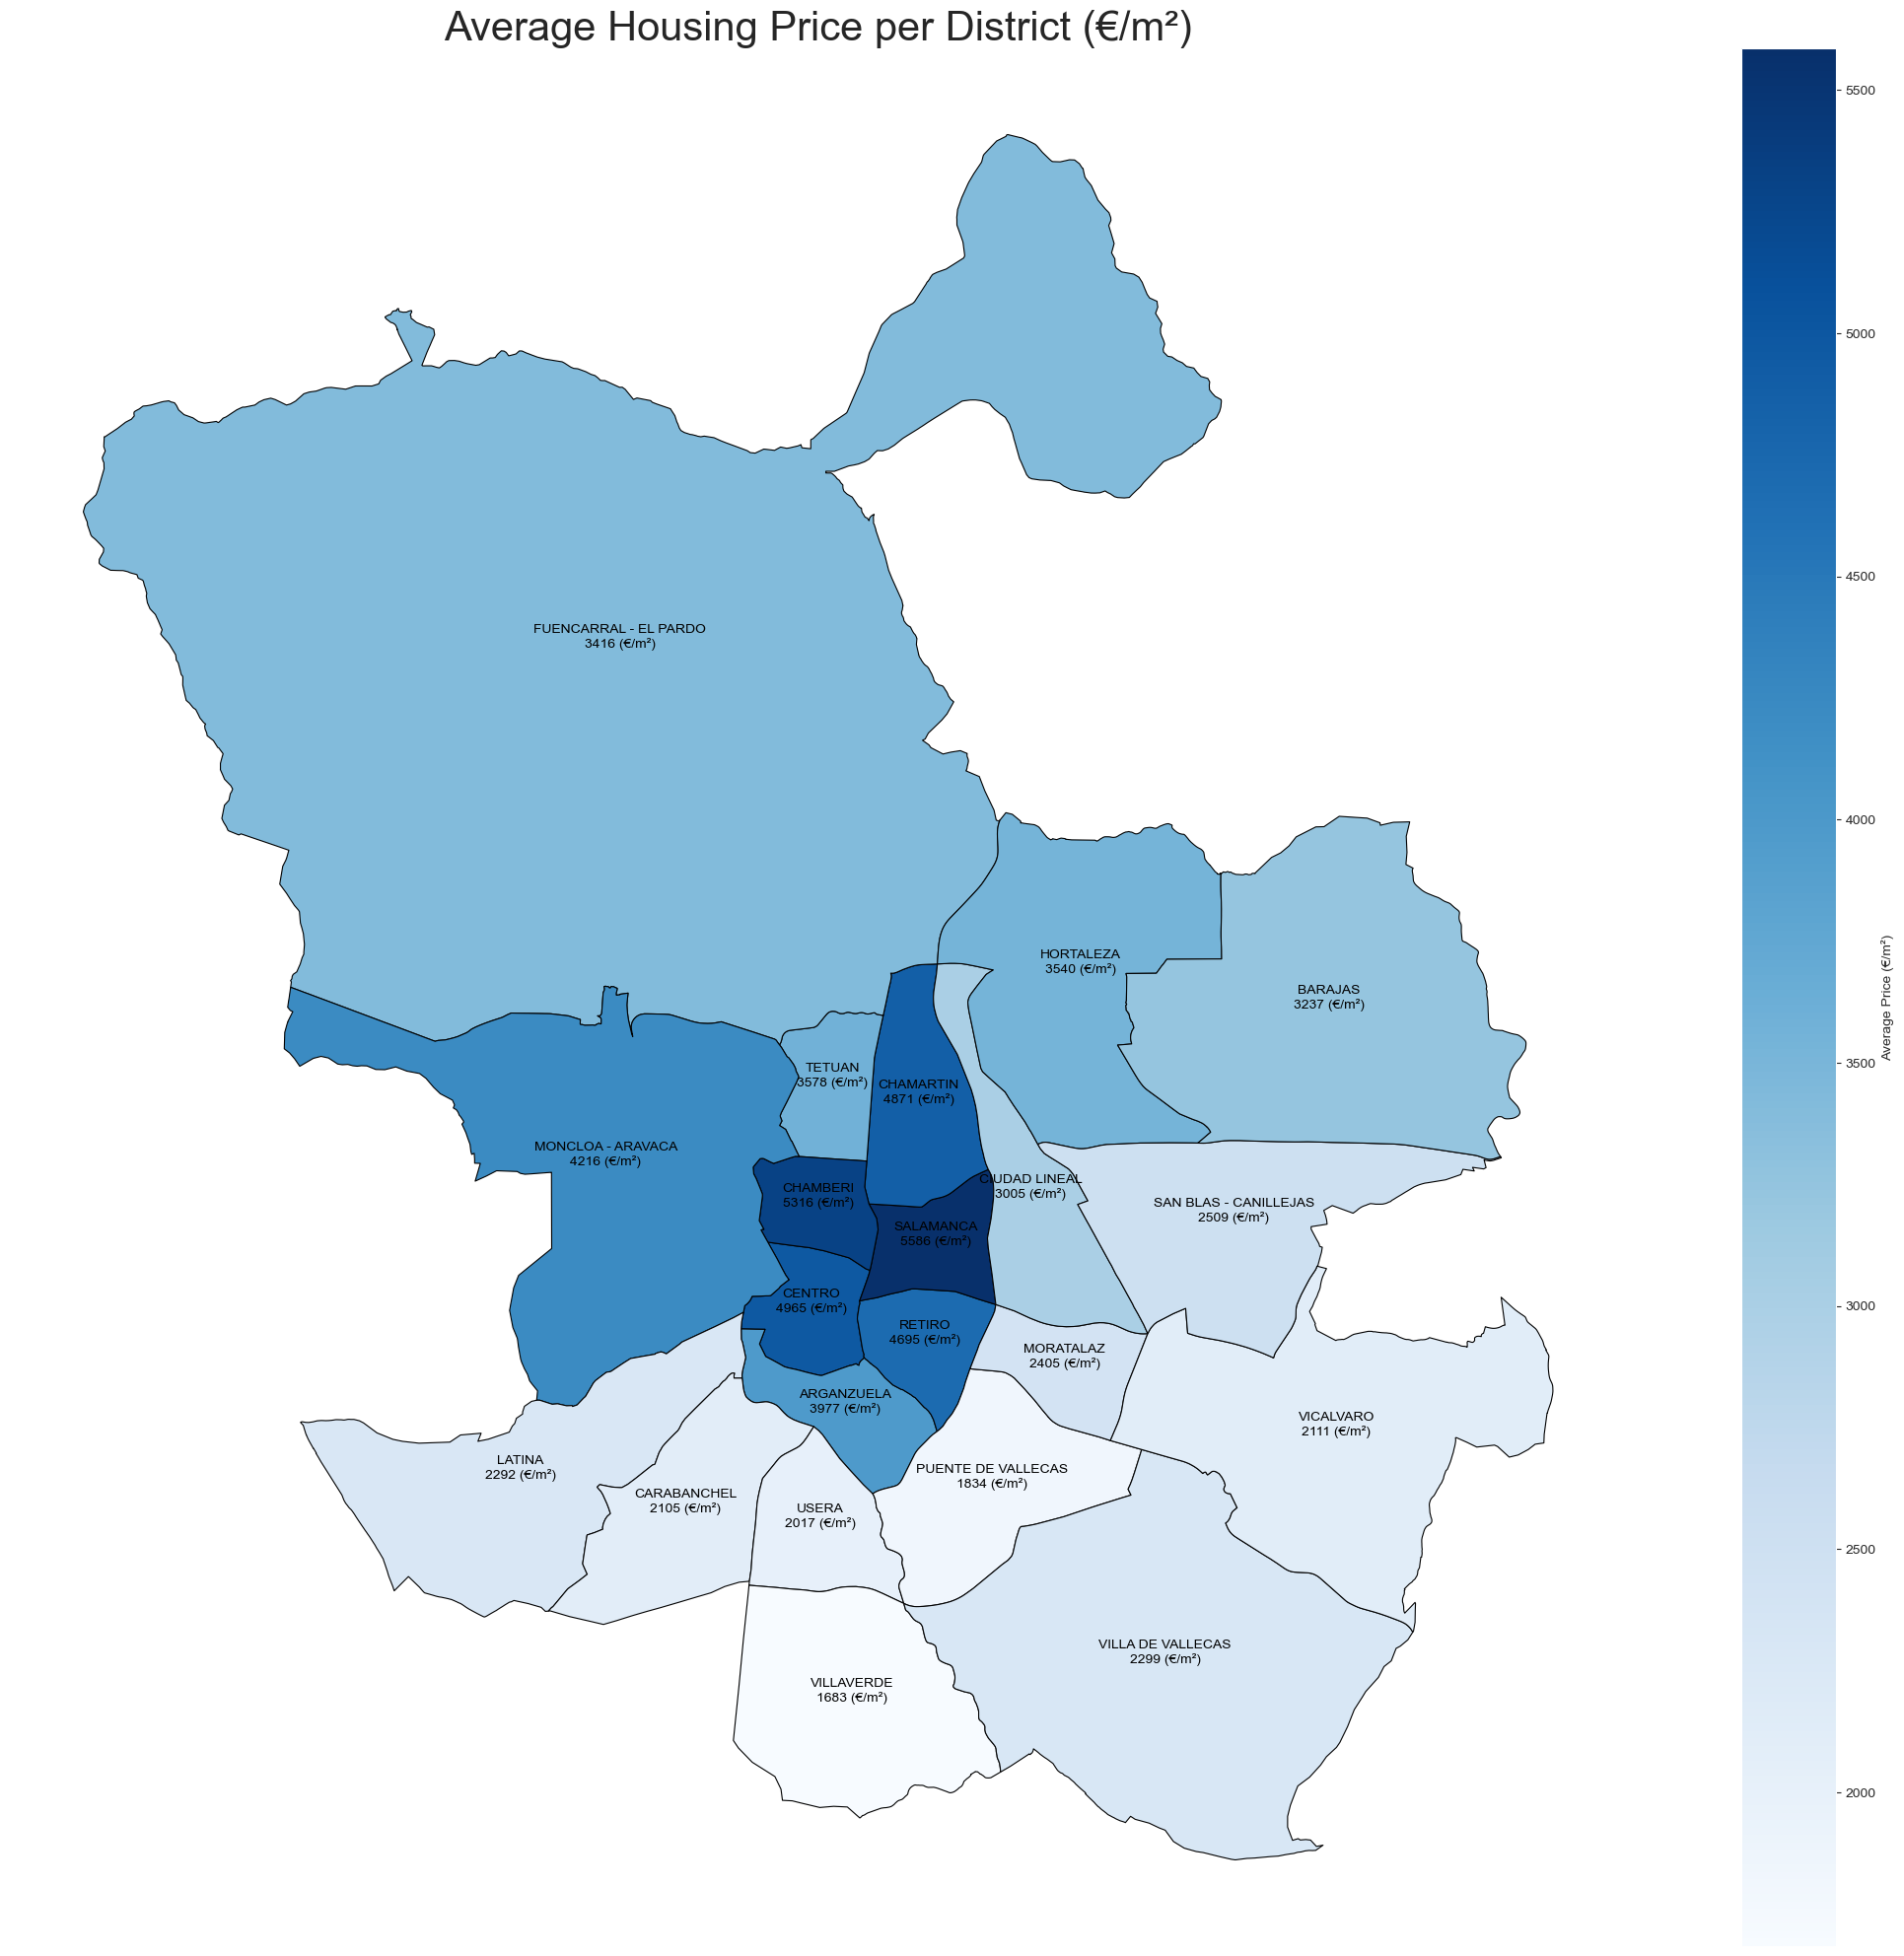

In [44]:
# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(30, 25))
district_with_price.plot(
    column='avg_price',               # Column used to color the map
    cmap='Blues',                     # Color palette
    linewidth=0.8,                    # Line width
    ax=ax,                            # Axes
    edgecolor='black',                # Edge color
    legend=True,                      # Display the legend
    legend_kwds={
        'label': "Average Price (€/m²)",
        'orientation': "vertical"
    }
)

# Add labels for districts with their average prices
for idx, row in district_with_price.iterrows():
    if not pd.isna(row['avg_price']):
        ax.annotate(
            text=f"{row['DISTRI_MAY']}\n{row['avg_price']:.0f} (€/m²)",  # Label with district name and price
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),       # Location of the label
            ha='center', fontsize=10, color='Black'
        )

# Style the plot
ax.set_title('Average Housing Price per District (€/m²)', fontsize=30)
ax.axis('off')  # Hide axes

# Ensure the 'plots/' directory exists
output_dir = 'plots/'
os.makedirs(output_dir, exist_ok=True)

# Save the plot
file_path = f'{output_dir}Average_Housing_Price_per_District.png'
plt.savefig(file_path, format='png', dpi=300)
plt.show()

In [45]:
# Muestra aleatoria de los datos
datos_map = data.sample(500, random_state=1242)
precios = datos_map['PRICE']

# Función para obtener colores según los precios normalizados
def get_color(precios_norm):
    scaled_prices = scale(precios_norm)
    colors = []
    for price in scaled_prices:
        if price <= -0.5:
            colors.append("green")
        elif price <= 0.75:
            colors.append("orange")
        else:
            colors.append("red")
    return colors

# Asignar colores basados en los precios
datos_map['color'] = get_color(np.log(precios))

# Crear el mapa base con Folium
mapa = folium.Map(location=[datos_map['LATITUDE'].mean(), datos_map['LONGITUDE'].mean()], zoom_start=12)

# Añadir marcadores con colores según el precio
for _, row in datos_map.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        icon=folium.Icon(color=row['color'], icon='info-sign'),
        popup=f"Price: {row['PRICE']} €"
    ).add_to(mapa)

# Guardar el mapa interactivo
mapa.save("plots/interactive_map.html")

# Mostrar el mapa
mapa


In [47]:
import geopandas as gpd
from shapely.geometry import Point

# Convert the DataFrame to a GeoDataFrame
data['geometry'] = data.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
df_sf = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")  # CRS corresponds to WGS84

In [56]:
from pysal.lib.weights import DistanceBand
from pysal.lib import weights
from shapely.geometry import Point

# Step 1: Filter neighbors within 0 to 0.5 km
# Convert coordinates into a NumPy array
coords = np.column_stack((df_sf['LONGITUDE'], df_sf['LATITUDE']))

# Create a DistanceBand weight matrix (0 to 0.5 km)
distance_band = DistanceBand(coords, threshold=0.5, binary=False, alpha=-2, decay='inverse_square', ids=df_sf.index)

# Step 2: Identify observations with no neighbors
no_neigh_idx = [i for i, neighbors in enumerate(distance_band.neighbors.values()) if len(neighbors) == 0]

# Remove rows with no neighbors
df_sf_filtered = df_sf.iloc[[i for i in range(len(df_sf)) if i not in no_neigh_idx]]
coords_filtered = np.column_stack((df_sf_filtered['LONGITUDE'], df_sf_filtered['LATITUDE']))

# Step 3: Recompute the filtered neighbor list (0 to 0.5 km)
filtered_distance_band = DistanceBand(coords_filtered, threshold=0.5, binary=False, alpha=-2, decay='inverse_square')

# Step 4: Convert the distance weights to a weight matrix
# Transform the DistanceBand into a PySAL weight object
weight_matrix = filtered_distance_band.to_W()

# Convert the weight matrix to a NumPy array
wm = weights.full(weight_matrix).toarray()

# Dimensions of the weight matrix
print(f"Dimensions of the weight matrix: {wm.shape}")

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: numpy._core.multiarray failed to import